In [1035]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Read Data

In [1036]:
train = pd.read_csv('../Dataset/FitbitTrainData.csv')
test = pd.read_csv('../Dataset/FitbitTestData.csv')

In [1037]:
len(train.columns)

30

In [1038]:
train.tail()

Total_MET  Avg_METs  TrackerDistance  TotalDistance  DistancePerStep  \
652    -1.3977   -1.6081          -1.3910        -1.3884          -3.1449   
653    -0.7509   -0.8956          -0.9662        -0.9657           0.1243   
654     0.1171    0.0603           0.4456         0.4391           0.6410   
655     0.2796    0.2393           0.4531         0.4465           0.5852   
656    -0.2976   -0.3964          -0.5039        -0.5057           0.0626   

     StepsbyDistance  TotalActiveDistance  TotalSteps  TotalActiveMinutes  \
652          -3.1428              -1.3739     -1.4903             -1.8877   
653           0.4276              -0.9539     -1.0063             -0.5013   
654          -0.0597               0.4427      0.3164              0.4971   
655          -0.0136               0.4626      0.3509              0.1753   
656           0.4963              -0.4917     -0.4603             -0.0722   

     ActiveRatio  ...  AveragePace  ActiveGroup  VeryActiveRatio  \
652      -1.8877  ...      -1.7074      -1.1442          -0.6212   
653      -0.5013  ...      -0.9217      -1.1442          -0.6212   
654       0.4971  ...       0.2673       0.2152          -0.4666   
655       0.1753  ...       0.5847       0.2152          -0.2881   
656      -0.0722  ...      -0.4545      -0.4645          -0.6212   

     VeryActiveDistance  FairlyActiveRatio  ActiveDistanceRatio  \
652             -0.5741            -0.6623              -3.1342   
653             -0.5741            -0.3659               0.3112   
654             -0.3849             0.9675               0.3128   
655             -0.3492             1.1529               0.3363   
656             -0.5741            -0.6623               0.3316   

     FairlyActiveMinutes  TotalUsageMinutes  ModeratelyActiveDistance  \
652              -0.6867             0.8245                   -0.6484   
653              -0.2951             0.8245                   -0.2619   
654               1.4671             0.8245                    1.5931   
655               1.2223            -0.2649                    1.1956   
656              -0.6867             0.8245                   -0.6484   

     Calories  
652      1347  
653      1529  
654      3012  
655      2899  
656      1827  

[5 rows x 30 columns]

In [1039]:
test.tail()

Total_MET  Avg_METs  TrackerDistance  TotalDistance  DistancePerStep  \
277    -0.6746   -0.8116          -0.8137        -0.8140           0.3854   
278    -1.1482   -1.3332          -1.1311        -1.1298           0.1981   
279     0.0145   -0.0527          -0.0391        -0.0433           0.1735   
280    -0.0016   -0.0704          -0.4664        -0.4684           0.4831   
281    -0.6870   -0.8253          -0.8063        -0.8066           0.7104   

     StepsbyDistance  TotalActiveDistance  TotalSteps  TotalActiveMinutes  \
277           0.1636              -0.7998     -0.8813             -0.8974   
278           0.3488              -1.1154     -1.2007             -1.4916   
279           0.3746              -0.0295      0.0269              0.1588   
280           0.0745              -0.4544     -0.5412             -0.7654   
281          -0.1152              -0.7924     -0.9254             -0.8892   

     ActiveRatio  ...  AveragePace  ActiveGroup  VeryActiveRatio  \
277      -0.8974  ...      -0.2127      -1.1442          -0.6212   
278      -1.4916  ...      -0.0251      -1.1442          -0.6212   
279       0.1588  ...      -0.0136       0.2152          -0.0026   
280      -0.7654  ...       0.4050      -1.1442           0.2846   
281      -0.8892  ...      -0.2058      -1.1442          -0.6212   

     VeryActiveDistance  FairlyActiveRatio  ActiveDistanceRatio  \
277             -0.5741            -0.6623               0.3316   
278             -0.5741            -0.6623               0.3316   
279              0.1970            -0.4030               0.3316   
280              0.1149            -0.0696               0.3316   
281             -0.5741            -0.6623               0.3316   

     FairlyActiveMinutes  TotalUsageMinutes  ModeratelyActiveDistance  \
277              -0.6867             0.3539                   -0.6484   
278              -0.6867             0.8245                   -0.6484   
279              -0.3441             0.8245                   -0.2730   
280               0.0965             0.8245                   -0.2951   
281              -0.6867            -1.1728                   -0.6484   

     Calories  
277      2498  
278      2229  
279      1835  
280      2643  
281      2660  

[5 rows x 30 columns]

# Feature Engineering

In [1040]:
# train['TotalUsageMinutes'] = train['VeryActiveMinutes'] + train['FairlyActiveMinutes'] + train['LightlyActiveMinutes'] + train['SedentaryMinutes']
# test['TotalUsageMinutes'] = test['VeryActiveMinutes'] + test['FairlyActiveMinutes'] + test['LightlyActiveMinutes'] + test['SedentaryMinutes']

# train = train.drop(columns=['VeryActiveMinutes',  'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes'])

# test = test.drop(columns=['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes'])

# Standard Scaler

In [1041]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi RobustScaler
robust_scaler = StandardScaler()

# Tentukan kolom yang akan diskalakan (semua kolom kecuali 'Calories')
col_to_scale = [col for col in train.columns if col != "Calories"]

# Fit scaler pada data pelatihan dan transformasi
train[col_to_scale] = robust_scaler.fit_transform(train[col_to_scale])

# Transformasi data pengujian dengan scaler yang sama
test[col_to_scale] = robust_scaler.transform(test[col_to_scale])

# Correlation Matrix

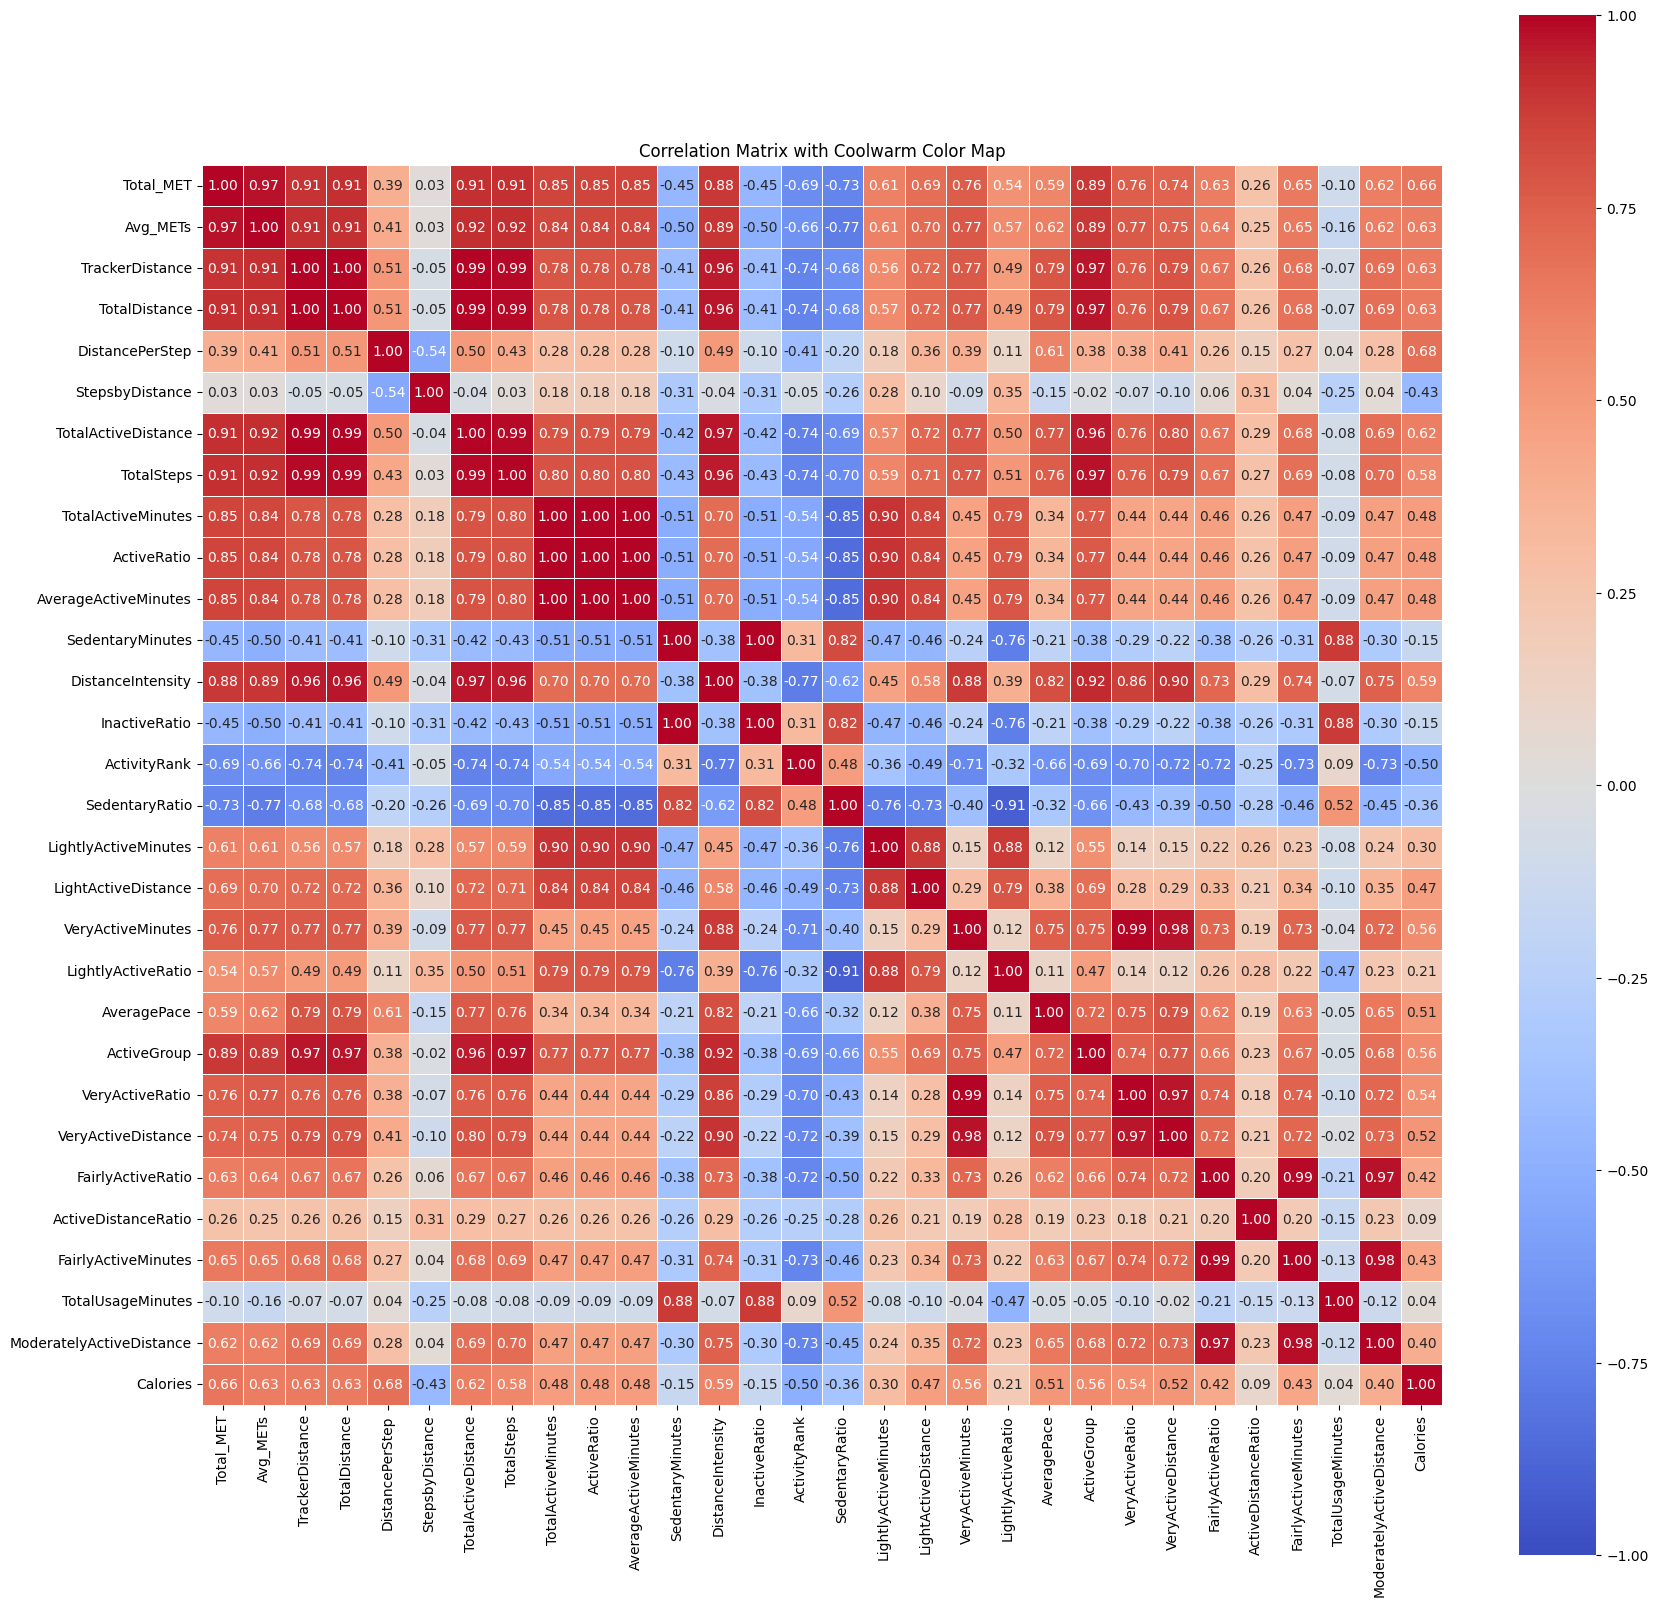

In [1042]:
# Langkah 1: Hitung matriks korelasi
correlation_matrix = train.corr(method='spearman')

# Langkah 2: Plot matriks korelasi menggunakan seaborn dengan cmap 'coolwarm'
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=.5)
plt.title('Correlation Matrix with Coolwarm Color Map')
plt.show()

In [1043]:
correlation_matrix

Total_MET  Avg_METs  TrackerDistance  TotalDistance  \
Total_MET                    1.0000    0.9692           0.9060         0.9064   
Avg_METs                     0.9692    1.0000           0.9103         0.9106   
TrackerDistance              0.9060    0.9103           1.0000         0.9997   
TotalDistance                0.9064    0.9106           0.9997         1.0000   
DistancePerStep              0.3888    0.4130           0.5115         0.5131   
StepsbyDistance              0.0310    0.0292          -0.0510        -0.0526   
TotalActiveDistance          0.9138    0.9189           0.9925         0.9927   
TotalSteps                   0.9120    0.9155           0.9921         0.9922   
TotalActiveMinutes           0.8451    0.8425           0.7825         0.7834   
ActiveRatio                  0.8451    0.8425           0.7825         0.7834   
AverageActiveMinutes         0.8451    0.8425           0.7825         0.7834   
SedentaryMinutes            -0.4489   -0.5044          -0.4111        -0.4108   
DistanceIntensity            0.8842    0.8943           0.9606         0.9611   
InactiveRatio               -0.4489   -0.5044          -0.4111        -0.4108   
ActivityRank                -0.6883   -0.6568          -0.7372        -0.7375   
SedentaryRatio              -0.7340   -0.7670          -0.6785        -0.6788   
LightlyActiveMinutes         0.6149    0.6133           0.5640         0.5653   
LightActiveDistance          0.6924    0.6998           0.7162         0.7165   
VeryActiveMinutes            0.7637    0.7748           0.7699         0.7705   
LightlyActiveRatio           0.5377    0.5657           0.4894         0.4902   
AveragePace                  0.5921    0.6187           0.7886         0.7885   
ActiveGroup                  0.8906    0.8886           0.9656         0.9656   
VeryActiveRatio              0.7554    0.7722           0.7593         0.7597   
VeryActiveDistance           0.7361    0.7470           0.7913         0.7921   
FairlyActiveRatio            0.6306    0.6436           0.6660         0.6657   
ActiveDistanceRatio          0.2617    0.2548           0.2644         0.2638   
FairlyActiveMinutes          0.6452    0.6479           0.6780         0.6777   
TotalUsageMinutes           -0.0980   -0.1552          -0.0743        -0.0731   
ModeratelyActiveDistance     0.6185    0.6192           0.6909         0.6910   
Calories                     0.6610    0.6266           0.6330         0.6330   

                          DistancePerStep  StepsbyDistance  \
Total_MET                          0.3888           0.0310   
Avg_METs                           0.4130           0.0292   
TrackerDistance                    0.5115          -0.0510   
TotalDistance                      0.5131          -0.0526   
DistancePerStep                    1.0000          -0.5395   
StepsbyDistance                   -0.5395           1.0000   
TotalActiveDistance                0.4972          -0.0397   
TotalSteps                         0.4268           0.0338   
TotalActiveMinutes                 0.2817           0.1758   
ActiveRatio                        0.2817           0.1758   
AverageActiveMinutes               0.2817           0.1758   
SedentaryMinutes                  -0.0956          -0.3069   
DistanceIntensity                  0.4941          -0.0366   
InactiveRatio                     -0.0956          -0.3069   
ActivityRank                      -0.4078          -0.0489   
SedentaryRatio                    -0.1959          -0.2616   
LightlyActiveMinutes               0.1761           0.2814   
LightActiveDistance                0.3572           0.1003   
VeryActiveMinutes                  0.3924          -0.0889   
LightlyActiveRatio                 0.1071           0.3504   
AveragePace                        0.6061          -0.1456   
ActiveGroup                        0.3761          -0.0235   
VeryActiveRatio                    0.3781          -0.0746   
VeryActiveDistance        

In [1044]:
# # Langkah 2: Tentukan threshold korelasi
# threshold = 0.7
# target = 'Calories'

# # Langkah 3: Temukan pasangan fitur dengan korelasi di atas threshold
# mask = (correlation_matrix.abs() > threshold) & (correlation_matrix != 1.0)
# high_corr_pairs = mask.stack().reset_index()
# high_corr_pairs = high_corr_pairs[high_corr_pairs[0]]
# high_corr_pairs.columns = ['Feature1', 'Feature2', 'AboveThreshold']

# # Langkah 4: Identifikasi fitur dengan korelasi lebih rendah dengan "Calories" dalam setiap pasangan
# to_drop = set()
# for _, row in high_corr_pairs.iterrows():
#     feature1, feature2 = row['Feature1'], row['Feature2']
    
#     # Jika fitur sudah di-drop, skip
#     if feature1 in to_drop or feature2 in to_drop:
#         continue
    
#     # Ambil korelasi dengan "Calories" untuk kedua fitur
#     corr_feature1 = correlation_matrix.at[feature1, target]
#     corr_feature2 = correlation_matrix.at[feature2, target]
    
#     # Simpan fitur yang memiliki korelasi lebih rendah dengan "Calories" untuk di-drop
#     if abs(corr_feature1) < abs(corr_feature2):
#         to_drop.add(feature1)
#     else:
#         to_drop.add(feature2)

# # Langkah 5: Buat DataFrame gabungan untuk fitur yang di-drop dan pasangan korelasinya
# combined_data = []
# for _, row in high_corr_pairs.iterrows():
#     feature1, feature2 = row['Feature1'], row['Feature2']
    
#     if feature1 in to_drop or feature2 in to_drop:
#         # Ambil korelasi masing-masing fitur dengan "Calories"
#         corr_feature1 = correlation_matrix.at[feature1, target]
#         corr_feature2 = correlation_matrix.at[feature2, target]
        
#         # Ambil korelasi antar fitur
#         corr_between_features = correlation_matrix.at[feature1, feature2]
        
#         combined_data.append({
#             'Dropped Feature': feature1 if feature1 in to_drop else feature2,
#             'Other Feature': feature1 if feature1 not in to_drop else feature2,
#             'Correlation with Calories Dropped Feature': corr_feature1 if feature1 in to_drop else corr_feature2,
#             'Correlation with Calories Other Feature': corr_feature2 if feature1 in to_drop else corr_feature1,
#             'Correlation Between Features': corr_between_features
#         })

# # Buat DataFrame dari data gabungan
# combined_df = pd.DataFrame(combined_data)

# # Urutkan berdasarkan korelasi antar fitur
# combined_df = combined_df.sort_values(by='Correlation Between Features', ascending=False).reset_index(drop=True)
# combined_df

In [1045]:
# to_drop

In [1046]:
# to_drop = set(to_drop)

In [1047]:
# len(to_drop)

In [1048]:
# to_drop = combined_df.head(7)['Dropped Feature'].to_list()
# to_drop

In [1049]:
# to_drop = [
# 'Avg_METs',
# 'TotalDistance',
# 'TotalSteps',
# 'ActiveRatio',
# 'VeryActiveDistance',
# 'InactiveRatio',
# 'ActivityRank',
# 'SedentaryRatio',
# "TotalActiveMinutes",
# "SedentaryMinutes"
# ]

In [1050]:
correlation_matrix = train.corr()

# Menginisialisasi daftar untuk fitur yang akan dihapus
to_drop = set()  # Menggunakan set untuk menghindari duplikasi

# Menentukan threshold korelasi
threshold = 0.8  # Threshold yang ingin diterapkan
print(f"Threshold korelasi: {threshold}")

# Kolom yang akan diperiksa, kecuali 'Calories'
checking = [x for x in correlation_matrix.columns if x != 'Calories']

# Iterasi untuk menemukan fitur dengan korelasi tinggi
for feature in checking:
    # Mencari fitur yang berkorelasi tinggi dengan fitur saat ini
    high_corr_features = correlation_matrix.index[abs(correlation_matrix[feature]) >= threshold].tolist()
    high_corr_features.remove(feature)  # Menghindari pencocokan dengan dirinya sendiri

    # Jika ada fitur berkorelasi tinggi
    if high_corr_features:
        print(f"\nFitur: {feature} berkorelasi tinggi dengan fitur: {high_corr_features}")
        
        # Menyimpan fitur yang akan dihapus
        to_drop.add(feature)  # Awalnya tambahkan fitur yang sedang dipertimbangkan untuk dihapus
        target_corr = correlation_matrix[feature]['Calories']
        print(f"Korelasi {feature} dengan Calories: {target_corr}")

        # Tentukan fitur mana yang akan dipertahankan
        for correlated_feature in high_corr_features:
            correlated_target_corr = correlation_matrix[correlated_feature]['Calories']
            print(f"Korelasi {correlated_feature} dengan Calories: {correlated_target_corr}")

            if abs(correlated_target_corr) > abs(target_corr):
                # Jika fitur berkorelasi tinggi memiliki korelasi target lebih besar, pertahankan itu
                print(f"Mempertahankan {correlated_feature} karena memiliki korelasi target lebih tinggi.")
                to_drop.discard(feature)  # Hapus dari daftar penghapusan
            else:
                # Hapus fitur yang memiliki korelasi target lebih rendah
                print(f"Menghapus {correlated_feature} karena memiliki korelasi target lebih rendah.")
                to_drop.add(correlated_feature)

# Print fitur yang akan dihapus
print("\nFitur yang akan dihapus:", to_drop)


Threshold korelasi: 0.8

Fitur: Total_MET berkorelasi tinggi dengan fitur: ['Avg_METs', 'TrackerDistance', 'TotalDistance', 'TotalActiveDistance', 'TotalSteps', 'TotalActiveMinutes', 'ActiveRatio', 'AverageActiveMinutes', 'ActiveGroup']
Korelasi Total_MET dengan Calories: 0.7110771333443557
Korelasi Avg_METs dengan Calories: 0.6724996152134458
Menghapus Avg_METs karena memiliki korelasi target lebih rendah.
Korelasi TrackerDistance dengan Calories: 0.6525996289095429
Menghapus TrackerDistance karena memiliki korelasi target lebih rendah.
Korelasi TotalDistance dengan Calories: 0.6521908266219412
Menghapus TotalDistance karena memiliki korelasi target lebih rendah.
Korelasi TotalActiveDistance dengan Calories: 0.6352891943171637
Menghapus TotalActiveDistance karena memiliki korelasi target lebih rendah.
Korelasi TotalSteps dengan Calories: 0.6018335628227415
Menghapus TotalSteps karena memiliki korelasi target lebih rendah.
Korelasi TotalActiveMinutes dengan Calories: 0.4926203531917645

In [1051]:
# Menampilkan fitur yang akan dihapus
print(f"{len(to_drop)} Fitur yang dihapus:\n", to_drop)

13 Fitur yang dihapus:
 {'ActiveRatio', 'FairlyActiveRatio', 'TotalUsageMinutes', 'StepsbyDistance', 'SedentaryMinutes', 'DistanceIntensity', 'InactiveRatio', 'DistancePerStep', 'Total_MET', 'VeryActiveMinutes', 'TotalActiveMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes'}


# Drop Columns

In [1052]:
# train = train.drop(columns=list(to_drop))
# test = test.drop(columns=list(to_drop))

# Data Prep

In [1053]:
# 1. Siapkan data
# X_train = train.drop(columns=['Calories'])
# X_test = test.drop(columns=['Calories'])

# ,'VeryActiveMinutes', 'StepsbyDistance', 'ActivityRank'
# ,'VeryActiveMinutes', 'StepsbyDistance', 'ActivityRank'
X_train = train[['DistancePerStep','Total_MET']]
X_test = test[['DistancePerStep','Total_MET']]

y_train = train['Calories']
y_test = test['Calories']


In [1054]:
train

Total_MET  Avg_METs  TrackerDistance  TotalDistance  DistancePerStep  \
0       0.5810    0.5713           0.6380         0.6305           0.5898   
1       0.1637    0.1117          -0.5464        -0.5480           0.1761   
2      -1.3523   -1.5580          -1.3660        -1.3635           0.1126   
3       0.1989    0.1504           0.3907         0.3844           0.7909   
4       1.1792    1.2302           0.1283         0.1233           0.4827   
..         ...       ...              ...            ...              ...   
652    -1.3977   -1.6081          -1.3910        -1.3884          -3.1449   
653    -0.7509   -0.8956          -0.9662        -0.9657           0.1243   
654     0.1171    0.0603           0.4456         0.4391           0.6410   
655     0.2796    0.2393           0.4531         0.4465           0.5852   
656    -0.2976   -0.3964          -0.5039        -0.5057           0.0626   

     StepsbyDistance  TotalActiveDistance  TotalSteps  TotalActiveMinutes  \
0            -0.0174               0.6415      0.5331              0.4971   
1             0.3719              -0.5339     -0.5431             -0.7489   
2             0.4404              -1.3490     -1.4617             -1.8052   
3            -0.1771               0.3955      0.1956              0.5136   
4             0.0748               0.1370      0.0695              0.1093   
..               ...                  ...         ...                 ...   
652          -3.1428              -1.3739     -1.4903             -1.8877   
653           0.4276              -0.9539     -1.0063             -0.5013   
654          -0.0597               0.4427      0.3164              0.4971   
655          -0.0136               0.4626      0.3509              0.1753   
656           0.4963              -0.4917     -0.4603             -0.0722   

     ActiveRatio  ...  AveragePace  ActiveGroup  VeryActiveRatio  \
0         0.4971  ...       0.4742       0.8949          -0.0075   
1        -0.7489  ...       0.1944      -1.1442           1.0358   
2        -1.8052  ...      -0.9310      -1.1442          -0.6212   
3         0.5136  ...       0.1951       0.2152          -0.5581   
4         0.1093  ...       0.2434       0.2152           2.1995   
..           ...  ...          ...          ...              ...   
652      -1.8877  ...      -1.7074      -1.1442          -0.6212   
653      -0.5013  ...      -0.9217      -1.1442          -0.6212   
654       0.4971  ...       0.2673       0.2152          -0.4666   
655       0.1753  ...       0.5847       0.2152          -0.2881   
656      -0.0722  ...      -0.4545      -0.4645          -0.6212   

     VeryActiveDistance  FairlyActiveRatio  ActiveDistanceRatio  \
0               -0.1814             1.6121               0.3274   
1                0.2399            -0.2548               0.3316   
2               -0.5741            -0.6623               0.3316   
3               -0.5170             0.8723               0.3268   
4                0.7111             0.2176               0.3316   
..                  ...                ...                  ...   
652             -0.5741            -0.6623              -3.1342   
653             -0.5741            -0.3659               0.3112   
654             -0.3849             0.9675               0.3128   
655             -0.3492             1.1529               0.3363   
656             -0.5741            -0.6623               0.3316   

     FairlyActiveMinutes  TotalUsageMinutes  ModeratelyActiveDistance  \
0                 1.3692            -0.8615                    1.2508   
1                -0.1483             0.8245                   -0.0411   
2                -0.6867             0.8245                   -0.6484   
3                 0.7328            -0.7763                    0.7097   
4                 0.0965            -0.9171                   -0.2288   
..                   ...                ...                       ...   
652              -0.68

In [1055]:
X_train

DistancePerStep  Total_MET
0             0.5898     0.5810
1             0.1761     0.1637
2             0.1126    -1.3523
3             0.7909     0.1989
4             0.4827     1.1792
..               ...        ...
652          -3.1449    -1.3977
653           0.1243    -0.7509
654           0.6410     0.1171
655           0.5852     0.2796
656           0.0626    -0.2976

[657 rows x 2 columns]

# Model: Baseline

## Import Libraries

In [1056]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score


In [1057]:
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    mean_absolute_percentage_error
)
import matplotlib.pyplot as plt
import time

## Evaluation Function

### Without CV

In [1058]:
# def evaluate_model(model, model_name):
#     start_time = time.time()
#     model.fit(X_train, y_train)
#     y_pred_train = model.predict(X_train)
#     y_pred_test = model.predict(X_test)
#     end_time = time.time()
    
#     rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
#     rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
#     r2_train = r2_score(y_train, y_pred_train)
#     r2_test = r2_score(y_test, y_pred_test)
#     mae_train = mean_absolute_error(y_train, y_pred_train)
#     mae_test = mean_absolute_error(y_test, y_pred_test)
#     mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
#     mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

#     # Hitung residual
#     residuals_train = y_train - y_pred_train
#     mean_residual_train = np.mean(residuals_train)  # Rata-rata residual
#     residuals = y_test - y_pred_test
#     mean_residual = np.mean(residuals)  # Rata-rata residual

#     # Plot residual
#     plt.figure(figsize=(14, 6))

#     plt.subplot(1, 2, 1)
#     plt.scatter(y_pred_test, residuals, color='blue', alpha=0.5)
#     plt.axhline(y=0, color='red', linestyle='--')
#     plt.title('Residuals vs Predicted Values')
#     plt.xlabel('Predicted Values')
#     plt.ylabel('Residuals')
    
#     #y actual vs y predicted
#     plt.subplot(1, 2, 2)
#     plt.scatter(y_test, y_pred_test, color='green', alpha=0.5)
#     plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis diagonal
#     plt.title('Actual vs Predicted Values')
#     plt.xlabel('Actual Values')
#     plt.ylabel('Predicted Values')
    
#     plt.tight_layout()
#     plt.show()

#     training_time = end_time - start_time

#     return {
#         'Model': model_name,
#         'Training Time (s)': training_time,
#         'RMSE Train': rmse_train,
#         'RMSE Test': rmse_test,
#         'R2 Train': r2_train,
#         'R2 Test': r2_test,
#         'MAE Train': mae_train,
#         'MAE Test': mae_test,
#         'Mean Residual Train': mean_residual_train,  # Rata-rata residual
#         'Mean Residual Test': mean_residual,  # Rata-rata residual
#         'MAPE Train': mape_train,
#         'MAPE Test': mape_test
#     }

# results = []

### With CV

In [1059]:
# def evaluate_model(model, model_name):
#     start_time = time.time()
    
#     # Melatih model
#     model.fit(X_train, y_train)
    
#     # Prediksi pada train dan test set
#     y_pred_train = model.predict(X_train)
#     y_pred_test = model.predict(X_test)
    
#     # Menghitung waktu pelatihan
#     end_time = time.time()
#     training_time = end_time - start_time

#     # Metrik untuk train set
#     rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
#     r2_train = r2_score(y_train, y_pred_train)
#     mae_train = mean_absolute_error(y_train, y_pred_train)
#     mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
    
#     # Metrik untuk test set
#     rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
#     r2_test = r2_score(y_test, y_pred_test)
#     mae_test = mean_absolute_error(y_test, y_pred_test)
#     mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

#     # Hitung residual
#     residuals_train = y_train - y_pred_train
#     mean_residual_train = np.mean(residuals_train)  # Rata-rata residual
#     residuals = y_test - y_pred_test
#     mean_residual = np.mean(residuals)  # Rata-rata residual

#     # Cross-validation scores untuk train set
#     cv_rmse_train = np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=3))
#     cv_r2_train = cross_val_score(model, X_train, y_train, scoring='r2', cv=3)
#     cv_mae_train = -cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)
#     cv_mape_train = -cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_percentage_error', cv=3)

#     # Rata-rata metrik cross-validation untuk train set
#     cv_rmse_train_mean = np.mean(cv_rmse_train)
#     cv_r2_train_mean = np.mean(cv_r2_train)
#     cv_mae_train_mean = np.mean(cv_mae_train)
#     cv_mape_train_mean = np.mean(cv_mape_train)

#     # Cross-validation scores untuk test set (karena kita tidak memiliki label asli di dalam test set)
#     cv_rmse_test = np.sqrt(-cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error', cv=3))
#     cv_r2_test = cross_val_score(model, X_test, y_test, scoring='r2', cv=3)
#     cv_mae_test = -cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_error', cv=3)
#     cv_mape_test = -cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_percentage_error', cv=3)

#     # Rata-rata metrik cross-validation untuk test set
#     cv_rmse_test_mean = np.mean(cv_rmse_test)
#     cv_r2_test_mean = np.mean(cv_r2_test)
#     cv_mae_test_mean = np.mean(cv_mae_test)
#     cv_mape_test_mean = np.mean(cv_mape_test)

#     # Plot residual
#     plt.figure(figsize=(14, 6))

#     plt.subplot(1, 2, 1)
#     plt.scatter(y_pred_test, residuals, color='blue', alpha=0.5)
#     plt.axhline(y=0, color='red', linestyle='--')
#     plt.title('Residuals vs Predicted Values')
#     plt.xlabel('Predicted Values')
#     plt.ylabel('Residuals')
    
#     # Y actual vs Y predicted
#     plt.subplot(1, 2, 2)
#     plt.scatter(y_test, y_pred_test, color='green', alpha=0.5)
#     plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis diagonal
#     plt.title('Actual vs Predicted Values')
#     plt.xlabel('Actual Values')
#     plt.ylabel('Predicted Values')
    
#     plt.tight_layout()
#     plt.show()

#     return {
#         'Model': model_name,
#         'Training Time (s)': training_time,
#         'RMSE Train': cv_rmse_train_mean, 
#         'R2 Train': cv_r2_train_mean,
#         'MAE Train': cv_mae_train_mean,
#         'MAPE Train': cv_mape_train_mean,
#         'RMSE Test': cv_rmse_test_mean, 
#         'R2 Test': cv_r2_test_mean,    
#         'MAE Test': cv_mae_test_mean,       
#         'Mean Residual Train': mean_residual_train,
#         'Mean Residual Test': mean_residual,        
#         'MAPE Test': cv_mape_test_mean              
#     }

# results = []

In [1060]:
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
# from sklearn.model_selection import cross_val_score, cross_val_predict
# import numpy as np
# import matplotlib.pyplot as plt
# import time

# def evaluate_model(model, model_name):
#     start_time = time.time()

#     # Cross-validation pada train set
#     y_cv_train_pred = cross_val_predict(model, X_train, y_train, cv=3)
#     cv_rmse_train = np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=3))
#     cv_r2_train = cross_val_score(model, X_train, y_train, scoring='r2', cv=3)
#     cv_mae_train = -cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)
#     cv_mape_train = -cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_percentage_error', cv=3)

#     # Latih model pada keseluruhan train set
#     model.fit(X_train, y_train)
#     training_time = time.time() - start_time

#     # Prediksi pada train dan test set
#     y_pred_train = model.predict(X_train)
#     y_pred_test = model.predict(X_test)

#     # Metrik untuk train set tanpa CV
#     # rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
#     # r2_train = r2_score(y_train, y_pred_train)
#     # mae_train = mean_absolute_error(y_train, y_pred_train)
#     # mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

#     # Metrik untuk test set
#     rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
#     r2_test = r2_score(y_test, y_pred_test)
#     mae_test = mean_absolute_error(y_test, y_pred_test)
#     mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

#     # Residuals untuk train dan test set
#     residuals_train = y_train - y_pred_train
#     residuals_test = y_test - y_pred_test

#     # Plot residual untuk train dan test
#     plt.figure(figsize=(18, 6))

#     # Plot residual train
#     plt.subplot(1, 3, 1)
#     plt.scatter(y_pred_train, residuals_train, color='blue', alpha=0.5)
#     plt.axhline(y=0, color='red', linestyle='--')
#     plt.title('Train Residuals')
#     plt.xlabel('Predicted Values (Train)')
#     plt.ylabel('Residuals (Train)')

#     # Plot residual test
#     plt.subplot(1, 3, 2)
#     plt.scatter(y_pred_test, residuals_test, color='green', alpha=0.5)
#     plt.axhline(y=0, color='red', linestyle='--')
#     plt.title('Test Residuals')
#     plt.xlabel('Predicted Values (Test)')
#     plt.ylabel('Residuals (Test)')

#     # Plot Actual vs Predicted
#     plt.subplot(1, 3, 3)
#     plt.scatter(y_test, y_pred_test, color='purple', alpha=0.5)
#     plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis diagonal
#     plt.title('Actual vs Predicted Values')
#     plt.xlabel('Actual Values')
#     plt.ylabel('Predicted Values')

#     plt.tight_layout()
#     plt.show()

#     # Hasil akhir sebagai dictionary
#     return {
#         'Model': model_name,
#         'Training Time (s)': training_time,
#         'Train RMSE': np.mean(cv_rmse_train),  # RMSE dari CV untuk train
#         'Train R2': np.mean(cv_r2_train),
#         'Train MAE': np.mean(cv_mae_train),
#         'Train MAPE': np.mean(cv_mape_train),
#         'Test RMSE': rmse_test,
#         'Test R2': r2_test,
#         'Test MAE': mae_test,
#         'Test MAPE': mape_test,
#         'Residual Mean Train': np.mean(residuals_train),
#         'Residual Mean Test': np.mean(residuals_test)
#     }

# # Contoh penggunaan
# results = []


In [1061]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import time
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
# from sklearn.model_selection import cross_validate

# def evaluate_model(model, model_name):
#     start_time = time.time()
    
#     # Cross-validate the model
#     cv_results = cross_validate(model, X_train, y_train, cv=3, 
#                                 scoring=['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error', 
#                                          'neg_mean_absolute_percentage_error'], 
#                                 return_train_score=True)

#     # Calculate metrics from cross-validation results
#     rmse_train = np.sqrt(-np.mean(cv_results['train_neg_mean_squared_error']))
#     rmse_test = np.sqrt(mean_squared_error(y_test, model.fit(X_train, y_train).predict(X_test)))
#     r2_train = np.mean(cv_results['train_r2'])
#     r2_test = r2_score(y_test, model.predict(X_test))
#     mae_train = -np.mean(cv_results['train_neg_mean_absolute_error'])
#     mae_test = mean_absolute_error(y_test, model.predict(X_test))
#     mape_train = -np.mean(cv_results['train_neg_mean_absolute_percentage_error'])
#     mape_test = mean_absolute_percentage_error(y_test, model.predict(X_test))

#     # Hitung residual
#     y_pred_train = model.predict(X_train)
#     y_pred_test = model.predict(X_test)
#     residuals_train = y_train - y_pred_train
#     mean_residual_train = np.mean(residuals_train)  # Rata-rata residual
#     residuals_test = y_test - y_pred_test
#     mean_residual_test = np.mean(residuals_test)  # Rata-rata residual

#     # Plot residual
#     plt.figure(figsize=(14, 6))

#     # Residuals vs Predicted Values
#     plt.subplot(1, 2, 1)
#     plt.scatter(y_pred_test, residuals_test, color='blue', alpha=0.5)
#     plt.axhline(y=0, color='red', linestyle='--')
#     plt.title('Residuals vs Predicted Values')
#     plt.xlabel('Predicted Values')
#     plt.ylabel('Residuals')
    
#     # Actual vs Predicted Values
#     plt.subplot(1, 2, 2)
#     plt.scatter(y_test, y_pred_test, color='green', alpha=0.5)
#     plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis diagonal
#     plt.title('Actual vs Predicted Values')
#     plt.xlabel('Actual Values')
#     plt.ylabel('Predicted Values')
    
#     plt.tight_layout()
#     plt.show()

#     end_time = time.time()
#     training_time = end_time - start_time

#     return {
#         'Model': model_name,
#         'Training Time (s)': training_time,
#         'RMSE Train': rmse_train,
#         'RMSE Test': rmse_test,
#         'R2 Train': r2_train,
#         'R2 Test': r2_test,
#         'MAE Train': mae_train,
#         'MAE Test': mae_test,
#         'Mean Residual Train': mean_residual_train,  # Rata-rata residual
#         'Mean Residual Test': mean_residual_test,  # Rata-rata residual
#         'MAPE Train': mape_train,
#         'MAPE Test': mape_test
#     }

# results = []


In [1062]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import time
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
# from sklearn.model_selection import KFold

# def evaluate_model(model, model_name):
#     start_time = time.time()
    
#     # Inisialisasi K-Fold
#     kf = KFold(n_splits=3, shuffle=True, random_state=42)
    
#     rmse_train_list = []
#     r2_train_list = []
#     mae_train_list = []
#     mape_train_list = []
    
#     # K-Fold Cross Validation
#     for train_index, val_index in kf.split(X_train):
#         X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
#         y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        
#         # Latih model pada lipatan
#         model.fit(X_train_fold, y_train_fold)
#         y_train_pred = model.predict(X_train_fold)
#         y_val_pred = model.predict(X_val_fold)
        
#         # Hitung metrik untuk lipatan
#         rmse_train_list.append(np.sqrt(mean_squared_error(y_train_fold, y_train_pred)))
#         r2_train_list.append(r2_score(y_train_fold, y_train_pred))
#         mae_train_list.append(mean_absolute_error(y_train_fold, y_train_pred))
#         mape_train_list.append(mean_absolute_percentage_error(y_train_fold, y_train_pred))

#     # Rata-rata metrik untuk data latih
#     rmse_train = np.mean(rmse_train_list)
#     r2_train = np.mean(r2_train_list)
#     mae_train = np.mean(mae_train_list)
#     mape_train = np.mean(mape_train_list)

#     # Latih model dengan semua data latih untuk evaluasi
#     model.fit(X_train, y_train)
    
#     # Hitung prediksi untuk data uji
#     y_test_pred = model.predict(X_test)
    
#     # Hitung metrik untuk data uji
#     rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
#     r2_test = r2_score(y_test, y_test_pred)
#     mae_test = mean_absolute_error(y_test, y_test_pred)
#     mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

#     # Hitung residual untuk data latih dan data uji
#     y_train_pred = model.predict(X_train)  # Prediksi pada seluruh data latih
#     residuals_train = y_train - y_train_pred
#     residuals_test = y_test - y_test_pred
#     mean_residual_train = np.mean(residuals_train)
#     mean_residual_test = np.mean(residuals_test)

#     # Plot residual
#     plt.figure(figsize=(14, 6))

#     # Residuals vs Predicted Values (data uji)
#     plt.subplot(1, 2, 1)
#     plt.scatter(y_test_pred, residuals_test, color='blue', alpha=0.5)
#     plt.axhline(y=0, color='red', linestyle='--')
#     plt.title('Residuals vs Predicted Values (Test)')
#     plt.xlabel('Predicted Values')
#     plt.ylabel('Residuals')
    
#     # Actual vs Predicted Values (data uji)
#     plt.subplot(1, 2, 2)
#     plt.scatter(y_test, y_test_pred, color='green', alpha=0.5)
#     plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis diagonal
#     plt.title('Actual vs Predicted Values (Test)')
#     plt.xlabel('Actual Values')
#     plt.ylabel('Predicted Values')
    
#     plt.tight_layout()
#     plt.show()

#     # Plot residuals untuk data latih
#     plt.figure(figsize=(8, 6))
#     plt.scatter(y_train_pred, residuals_train, color='orange', alpha=0.5)
#     plt.axhline(y=0, color='red', linestyle='--')
#     plt.title('Residuals vs Predicted Values (Train)')
#     plt.xlabel('Predicted Values (Train)')
#     plt.ylabel('Residuals (Train)')
#     plt.show()

#     end_time = time.time()
#     training_time = end_time - start_time

#     return {
#         'Model': model_name,
#         'Training Time (s)': training_time,
#         'RMSE Train': rmse_train,
#         'RMSE Test': rmse_test,
#         'R2 Train': r2_train,
#         'R2 Test': r2_test,
#         'MAE Train': mae_train,
#         'MAE Test': mae_test,
#         'Mean Residual Train': mean_residual_train,
#         'Mean Residual Test': mean_residual_test,
#         'MAPE Train': mape_train,
#         'MAPE Test': mape_test
#     }

# results = []


In [1063]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import KFold

def evaluate_model(model, model_name):
    start_time = time.time()
    
    # Inisialisasi K-Fold
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    
    rmse_train_list = []
    r2_train_list = []
    mae_train_list = []
    mape_train_list = []
    
    # K-Fold Cross Validation
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Latih model pada lipatan
        model.fit(X_train_fold, y_train_fold)
        y_train_pred = model.predict(X_train_fold)
        y_val_pred = model.predict(X_val_fold)
        
        # Hitung metrik untuk lipatan
        rmse_train_list.append(np.sqrt(mean_squared_error(y_train_fold, y_train_pred)))
        r2_train_list.append(r2_score(y_train_fold, y_train_pred))
        mae_train_list.append(mean_absolute_error(y_train_fold, y_train_pred))
        mape_train_list.append(mean_absolute_percentage_error(y_train_fold, y_train_pred))

    # Rata-rata metrik untuk data latih
    rmse_train = np.mean(rmse_train_list)
    r2_train = np.mean(r2_train_list)
    mae_train = np.mean(mae_train_list)
    mape_train = np.mean(mape_train_list)

    # Latih model dengan semua data latih untuk evaluasi
    model.fit(X_train, y_train)
    
    # Hitung prediksi untuk data uji
    y_test_pred = model.predict(X_test)
    
    # Hitung metrik untuk data uji
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

    # Hitung residual untuk data latih dan data uji
    y_train_pred = model.predict(X_train)  # Prediksi pada seluruh data latih
    residuals_train = y_train - y_train_pred
    residuals_test = y_test - y_test_pred
    mean_residual_train = np.mean(residuals_train)
    mean_residual_test = np.mean(residuals_test)

    # Plot residual
    plt.figure(figsize=(14, 6))

    # Plot residual dan nilai aktual vs prediksi
    plt.figure(figsize=(20, 6))

    # Residuals vs Predicted Values (data latih)
    plt.subplot(1, 3, 1)
    plt.scatter(y_train_pred, residuals_train, color='orange', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals vs Predicted Values (Train)')
    plt.xlabel('Predicted Values (Train)')
    plt.ylabel('Residuals (Train)')
    
    # Residuals vs Predicted Values (data uji)
    plt.subplot(1, 3, 2)
    plt.scatter(y_test_pred, residuals_test, color='blue', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals vs Predicted Values (Test)')
    plt.xlabel('Predicted Values (Test)')
    plt.ylabel('Residuals (Test)')
    
    # Actual vs Predicted Values (data uji)
    plt.subplot(1, 3, 3)
    plt.scatter(y_test, y_test_pred, color='green', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis diagonal
    plt.title('Actual vs Predicted Values (Test)')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

    end_time = time.time()
    training_time = end_time - start_time

    return {
        'Model': model_name,
        'Training Time (s)': training_time,
        'RMSE Train': rmse_train,
        'RMSE Test': rmse_test,
        'R2 Train': r2_train,
        'R2 Test': r2_test,
        'MAE Train': mae_train,
        'MAE Test': mae_test,
        'Mean Residual Train': mean_residual_train,
        'Mean Residual Test': mean_residual_test,
        'MAPE Train': mape_train,
        'MAPE Test': mape_test
    }

results = []


## Random Forest

<Figure size 1400x600 with 0 Axes>

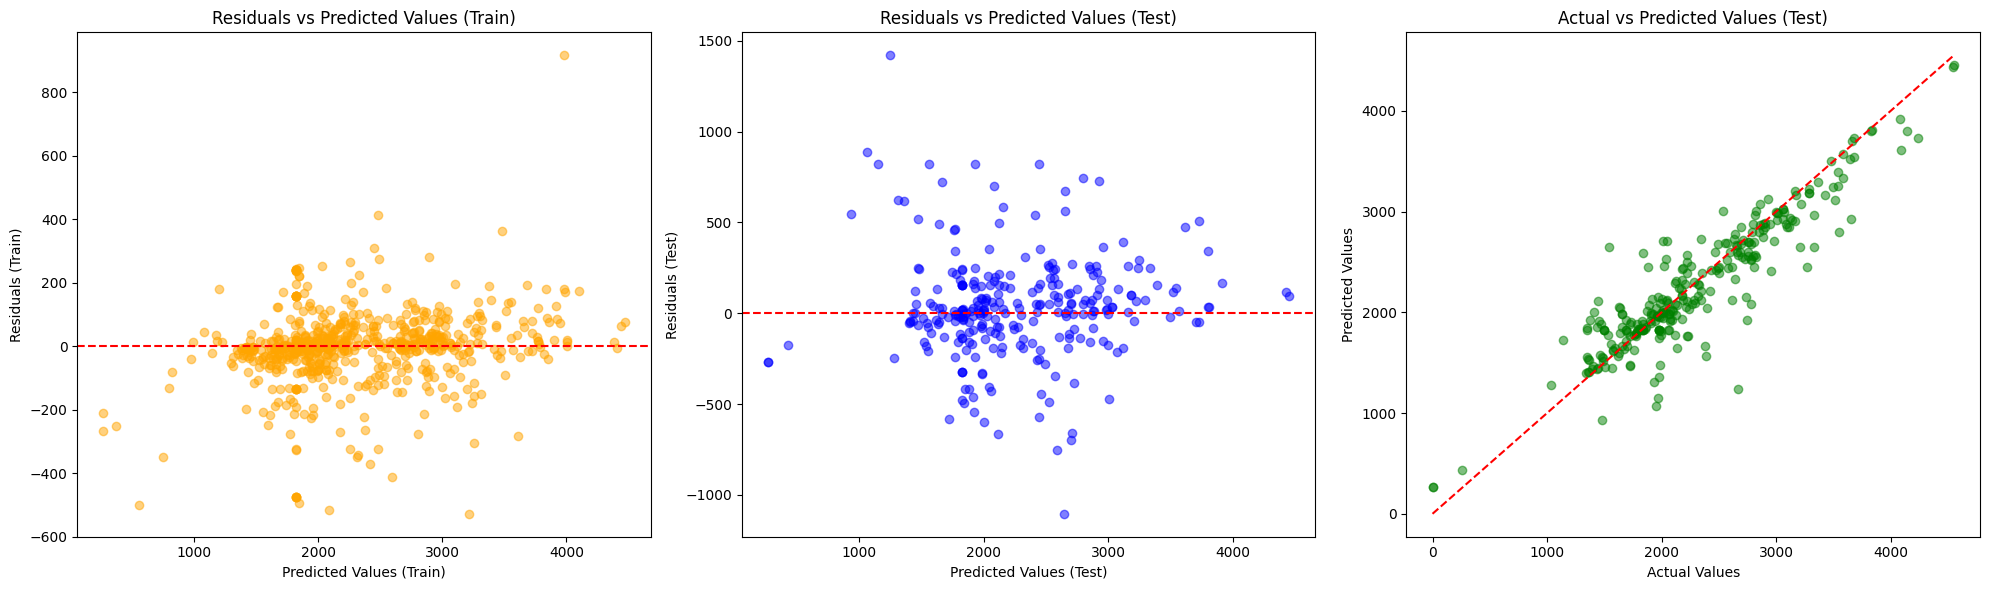

{'Model': 'Random Forest',
 'Training Time (s)': 0.7310869693756104,
 'RMSE Train': 128.69880243550506,
 'RMSE Test': 291.9169257456662,
 'R2 Train': 0.9675231152098213,
 'R2 Test': 0.8313026100790539,
 'MAE Train': 82.59591854935064,
 'MAE Test': 197.81702374222914,
 'Mean Residual Train': -5.050554622845528,
 'Mean Residual Test': 36.354494936385215,
 'MAPE Train': 2198392400295978.0,
 'MAPE Test': 8522685854100327.0}

In [1064]:
rf_results = evaluate_model(RandomForestRegressor(random_state=42), 'Random Forest')
results.append(rf_results)
rf_results

## Linear Regression

<Figure size 1400x600 with 0 Axes>

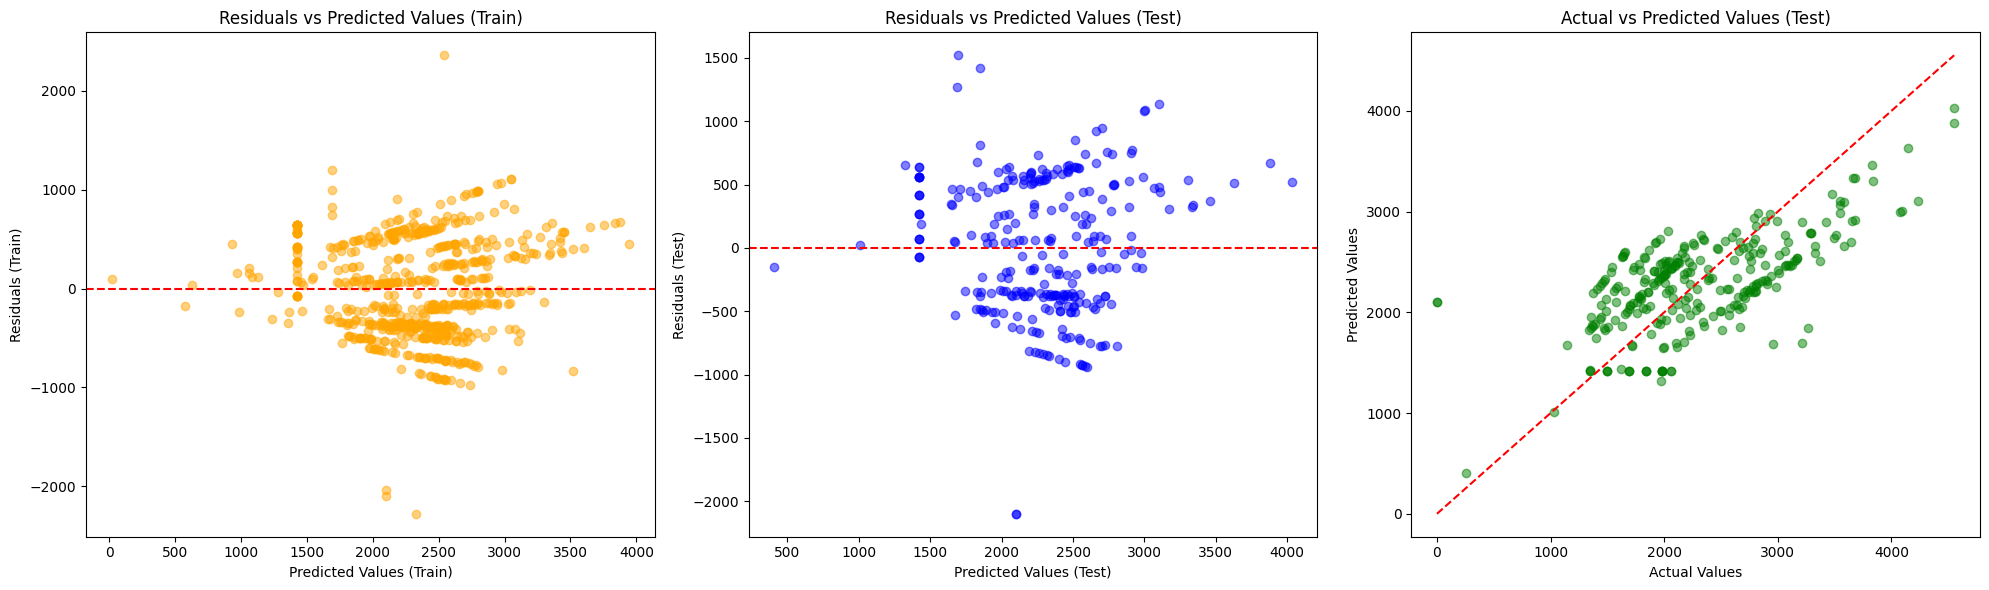

{'Model': 'Linear Regression',
 'Training Time (s)': 0.2774159908294678,
 'RMSE Train': 498.3790155207821,
 'RMSE Test': 537.6257489045356,
 'R2 Train': 0.5128197037960647,
 'R2 Test': 0.4277972629102791,
 'MAE Train': 416.8842367854192,
 'MAE Test': 452.2749161916145,
 'Mean Residual Train': 1.3289420299878403e-13,
 'Mean Residual Test': 12.5263676276461,
 'MAPE Train': 1.452165272226261e+16,
 'MAPE Test': 6.706247975830674e+16}

In [1065]:
lr_results = evaluate_model(LinearRegression(), 'Linear Regression')
results.append(lr_results)
lr_results

## Ridge

<Figure size 1400x600 with 0 Axes>

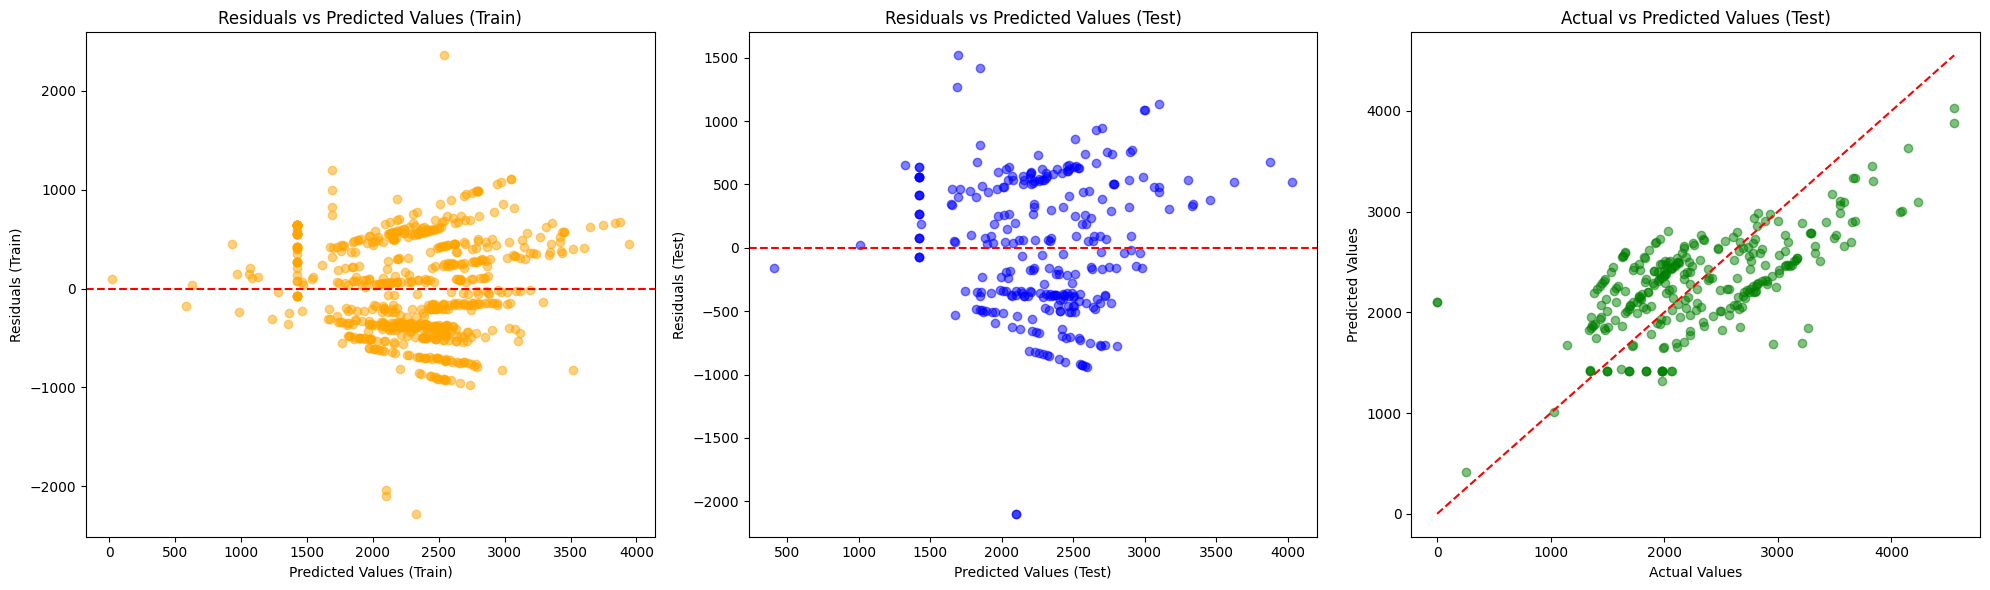

{'Model': 'Ridge',
 'Training Time (s)': 0.27738499641418457,
 'RMSE Train': 498.3803542398958,
 'RMSE Test': 537.567533693421,
 'R2 Train': 0.5128170908090403,
 'R2 Test': 0.4279211747568442,
 'MAE Train': 416.86718635409926,
 'MAE Test': 452.22267893627725,
 'Mean Residual Train': 1.301255737696427e-13,
 'Mean Residual Test': 12.471351271228567,
 'MAPE Train': 1.4511587860942398e+16,
 'MAPE Test': 6.703091608536475e+16}

In [1066]:
ridge_results = evaluate_model(Ridge(random_state=42), 'Ridge')
results.append(ridge_results)
ridge_results

## Lasso

<Figure size 1400x600 with 0 Axes>

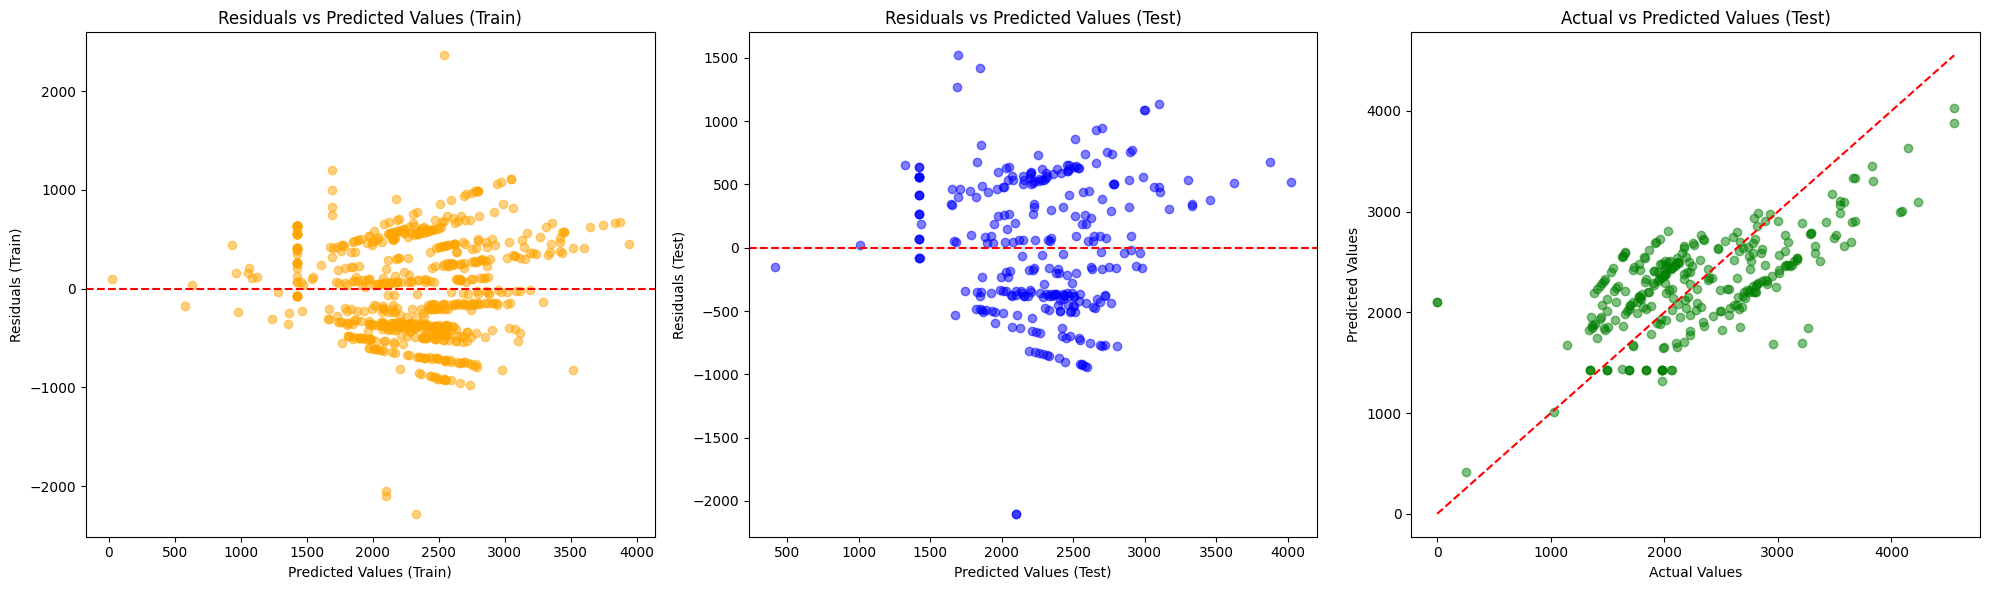

{'Model': 'Lasso',
 'Training Time (s)': 0.2988255023956299,
 'RMSE Train': 498.38037036092845,
 'RMSE Test': 537.6927019115491,
 'R2 Train': 0.5128170480816482,
 'R2 Test': 0.4276547359593248,
 'MAE Train': 416.82638574893514,
 'MAE Test': 452.25436583536884,
 'Mean Residual Train': 1.218196860822187e-13,
 'Mean Residual Test': 12.507693382396473,
 'MAPE Train': 1.4536254897288518e+16,
 'MAPE Test': 6.712907336564935e+16}

In [1067]:
lasso_results = evaluate_model(Lasso(random_state=42), 'Lasso')
results.append(lasso_results)
lasso_results

## Elastic Net

<Figure size 1400x600 with 0 Axes>

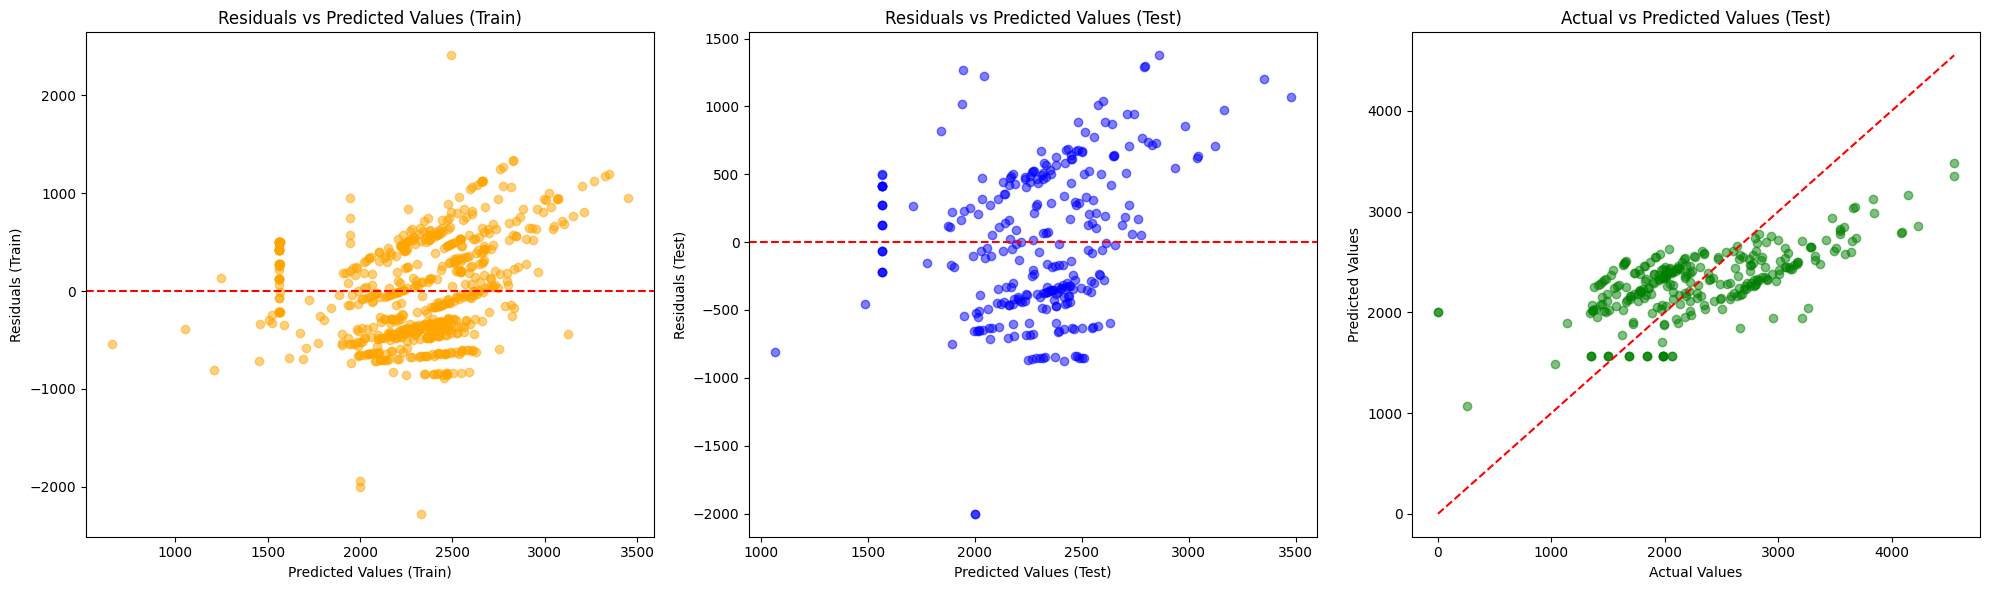

{'Model': 'Elastic Net',
 'Training Time (s)': 0.26949119567871094,
 'RMSE Train': 522.1813723833384,
 'RMSE Test': 549.1159879145985,
 'R2 Train': 0.4653861623146196,
 'R2 Test': 0.40307744774670806,
 'MAE Train': 434.7890938892772,
 'MAE Test': 459.99033055744917,
 'Mean Residual Train': 1.3566283222792536e-13,
 'Mean Residual Test': 2.6739568829150504,
 'MAPE Train': 1.3820396917680066e+16,
 'MAPE Test': 6.394096990368173e+16}

In [1068]:
elastic_net_results = evaluate_model(ElasticNet(random_state=42), 'Elastic Net')
results.append(elastic_net_results)
elastic_net_results

## Decision Tree

<Figure size 1400x600 with 0 Axes>

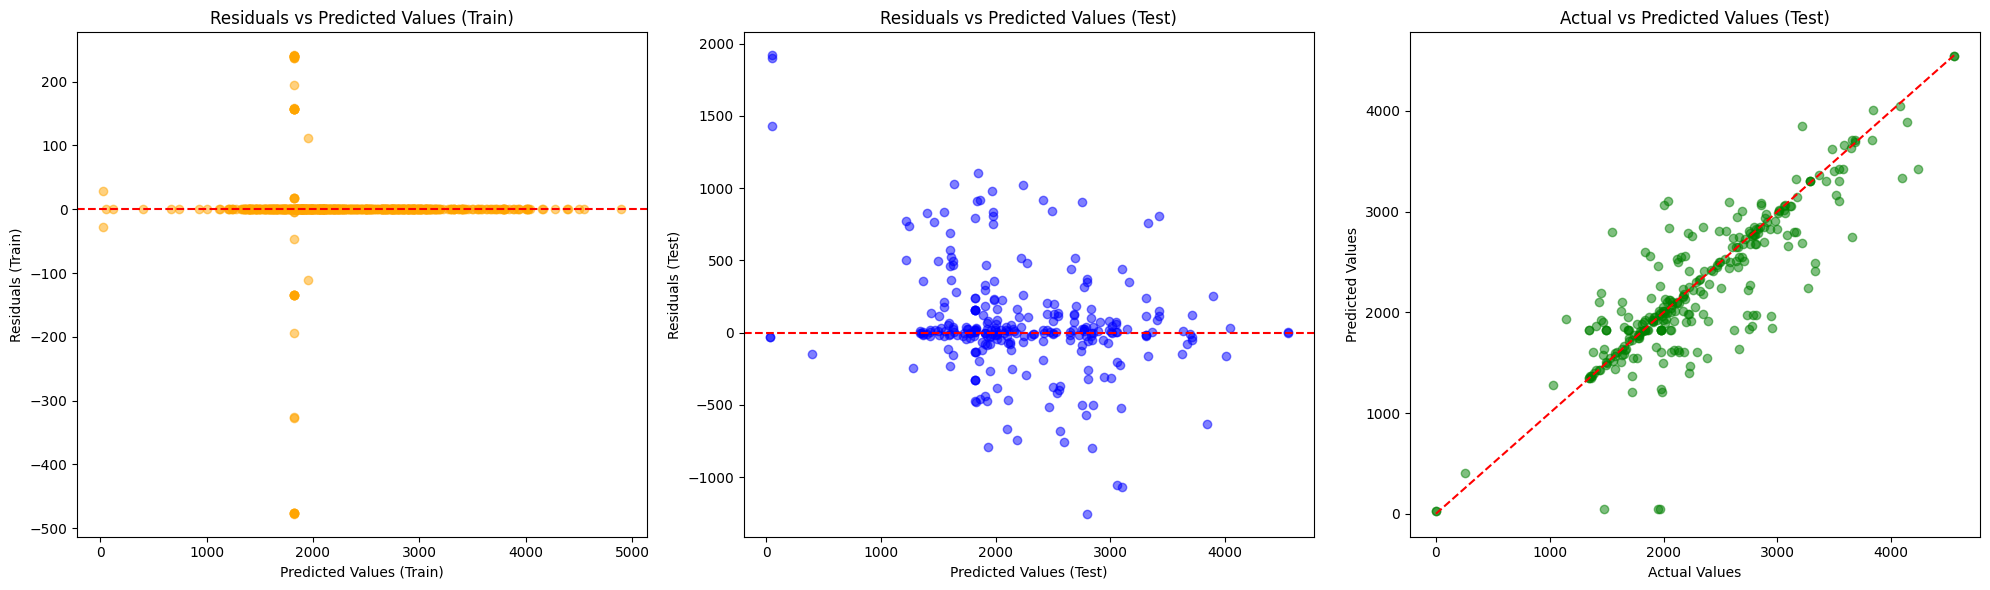

{'Model': 'Decision Tree',
 'Training Time (s)': 0.2775280475616455,
 'RMSE Train': 62.761390759849064,
 'RMSE Test': 390.49253478509553,
 'R2 Train': 0.9923022701330185,
 'R2 Test': 0.6981332484627811,
 'MAE Train': 13.610337291253686,
 'MAE Test': 230.87940379403796,
 'Mean Residual Train': 5.191179804640001e-15,
 'Mean Residual Test': 63.0719886986104,
 'MAPE Train': 97680813835661.44,
 'MAPE Test': 910302052340844.9}

In [1069]:
dt_results = evaluate_model(DecisionTreeRegressor(random_state=42), 'Decision Tree')
results.append(dt_results)
dt_results

## XGBoost

<Figure size 1400x600 with 0 Axes>

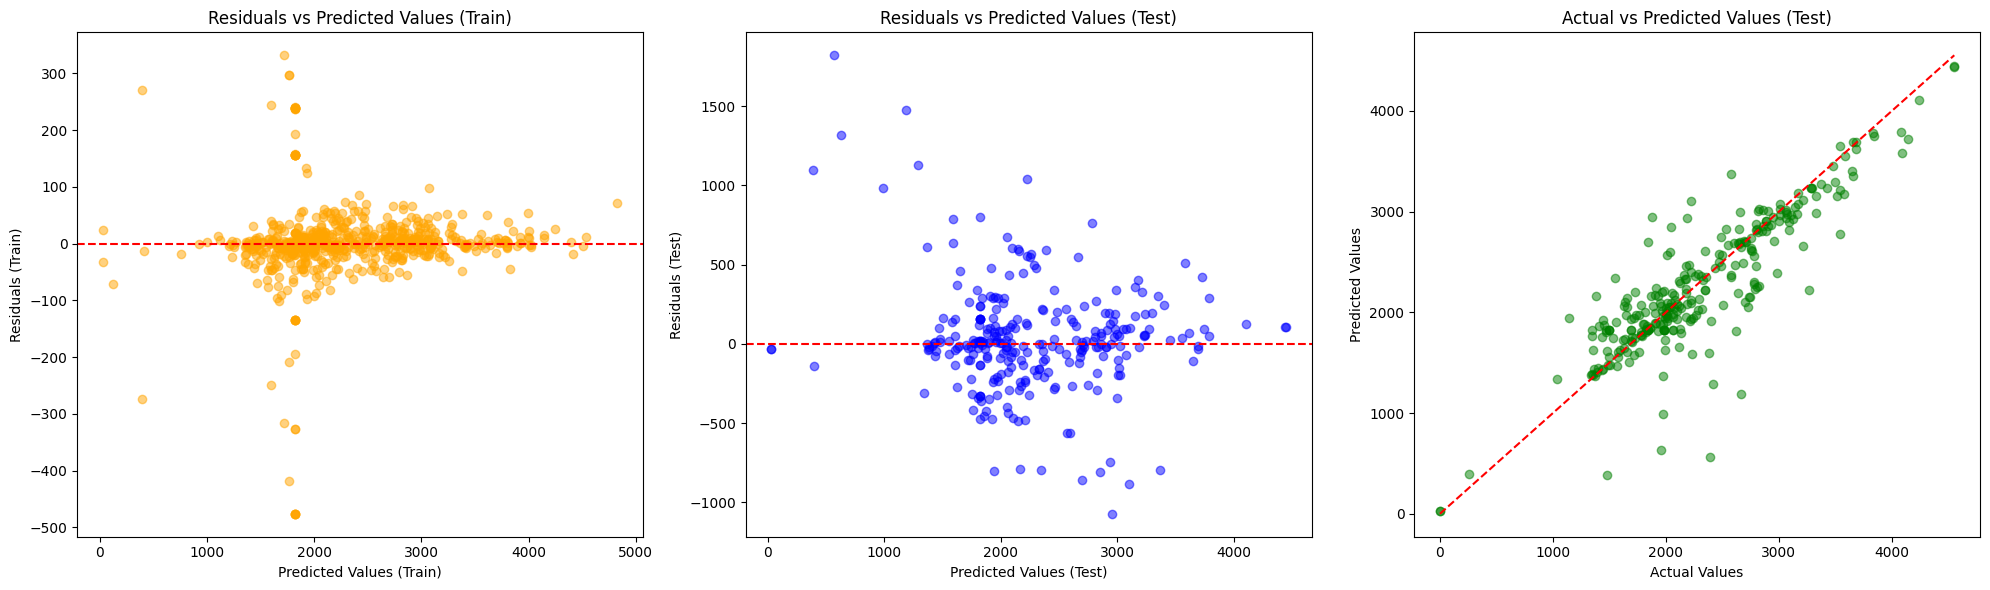

{'Model': 'XGBoost',
 'Training Time (s)': 0.46135401725769043,
 'RMSE Train': 66.91386954474278,
 'RMSE Test': 349.6960638955206,
 'R2 Train': 0.9912501074946968,
 'R2 Test': 0.7579130951685933,
 'MAE Train': 25.909415681612543,
 'MAE Test': 225.48500188191733,
 'Mean Residual Train': 0.009793703958868437,
 'Mean Residual Test': 33.149176550249685,
 'MAPE Train': 79483441077137.36,
 'MAPE Test': 1035610677895458.5}

In [1070]:
xgb_results = evaluate_model(XGBRegressor(random_state=42), 'XGBoost')
results.append(xgb_results)
xgb_results

## Gradient Boosting

<Figure size 1400x600 with 0 Axes>

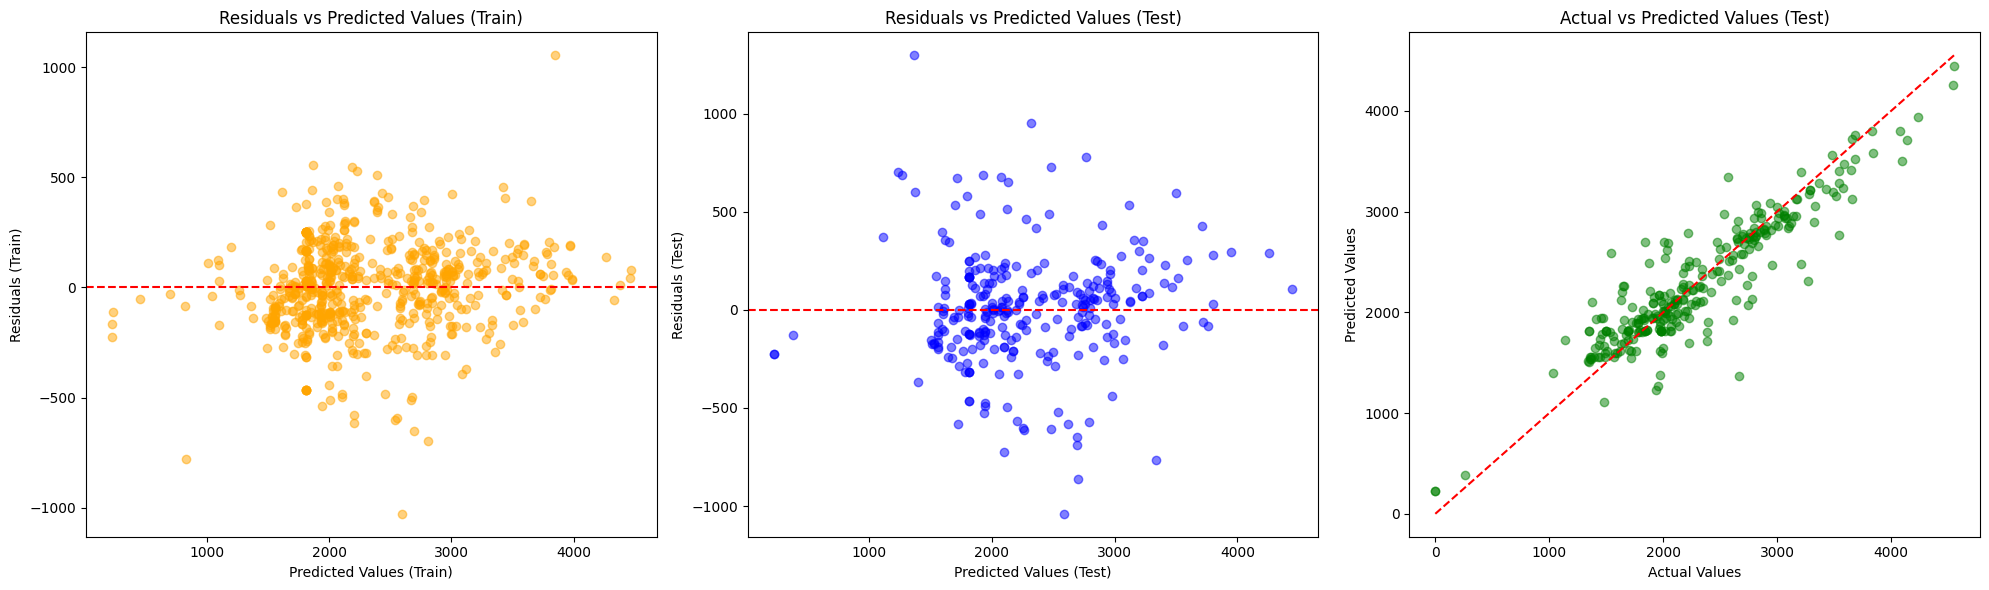

{'Model': 'Gradient Boosting',
 'Training Time (s)': 0.4578883647918701,
 'RMSE Train': 183.82442846833388,
 'RMSE Test': 291.97201478911654,
 'R2 Train': 0.9337388550025495,
 'R2 Test': 0.8312389326837228,
 'MAE Train': 137.90652135238966,
 'MAE Test': 206.66715422298134,
 'Mean Residual Train': -5.8833371119253345e-15,
 'Mean Residual Test': 8.96278729200879,
 'MAPE Train': 997832987669267.6,
 'MAPE Test': 7129409365473846.0}

In [1071]:
gb_results = evaluate_model(GradientBoostingRegressor(random_state=42), 'Gradient Boosting')
results.append(gb_results)
gb_results

## SVR

<Figure size 1400x600 with 0 Axes>

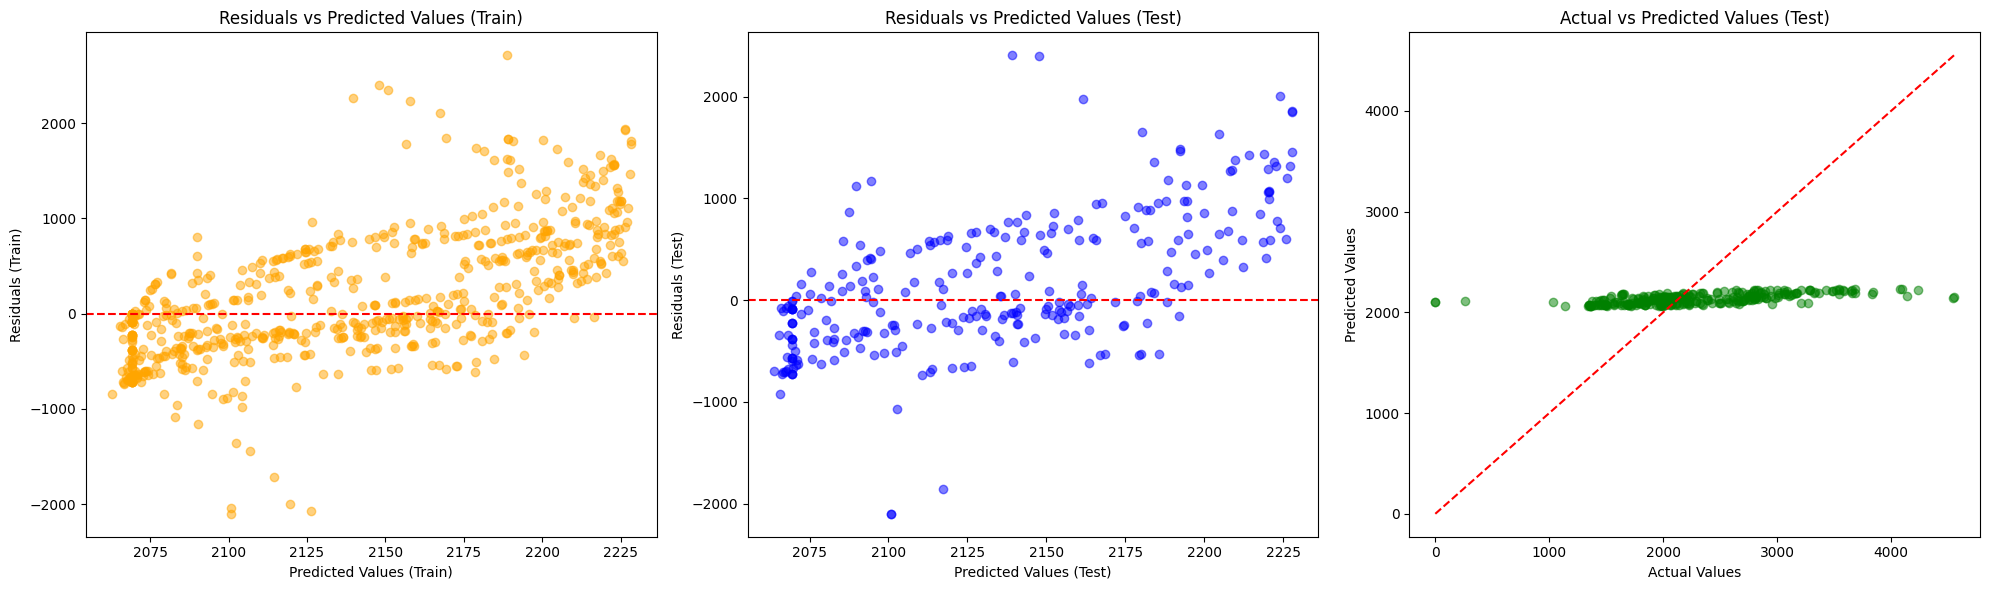

{'Model': 'Support Vector Regressor',
 'Training Time (s)': 0.4100642204284668,
 'RMSE Train': 710.0343976198506,
 'RMSE Test': 699.2154967697849,
 'R2 Train': 0.013591238808149756,
 'R2 Test': 0.03214143001904901,
 'MAE Train': 538.402911338496,
 'MAE Test': 529.4216039154064,
 'Mean Residual Train': 170.96143370099023,
 'Mean Residual Test': 163.46245572303062,
 'MAPE Train': 1.4675995916330898e+16,
 'MAPE Test': 6.71018657411017e+16}

In [1072]:
svr_results = evaluate_model(SVR(), 'Support Vector Regressor')
results.append(svr_results)
svr_results

## Bayesian Ridge

<Figure size 1400x600 with 0 Axes>

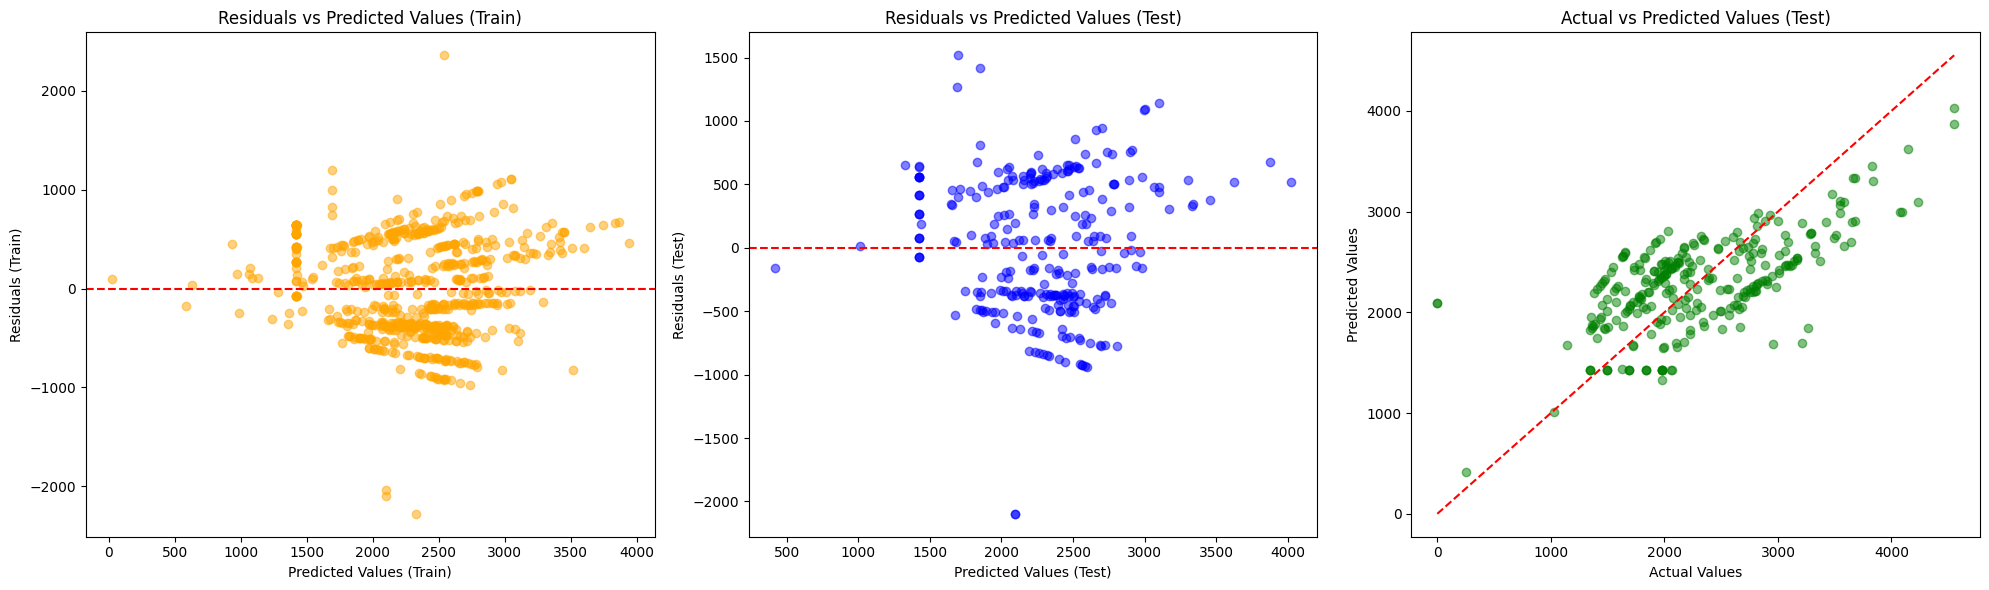

{'Model': 'Bayesian Ridge',
 'Training Time (s)': 0.28886866569519043,
 'RMSE Train': 498.38539644232475,
 'RMSE Test': 537.500882401789,
 'R2 Train': 0.5128071114511159,
 'R2 Test': 0.428063026436613,
 'MAE Train': 416.84148146116155,
 'MAE Test': 452.1616182664943,
 'Mean Residual Train': 1.2458831531136003e-13,
 'Mean Residual Test': 12.407048016324294,
 'MAPE Train': 1.4501071866128318e+16,
 'MAPE Test': 6.699417889924251e+16}

In [1073]:
br_results = evaluate_model(BayesianRidge(), 'Bayesian Ridge')
results.append(br_results)
br_results

## CatBoost

<Figure size 1400x600 with 0 Axes>

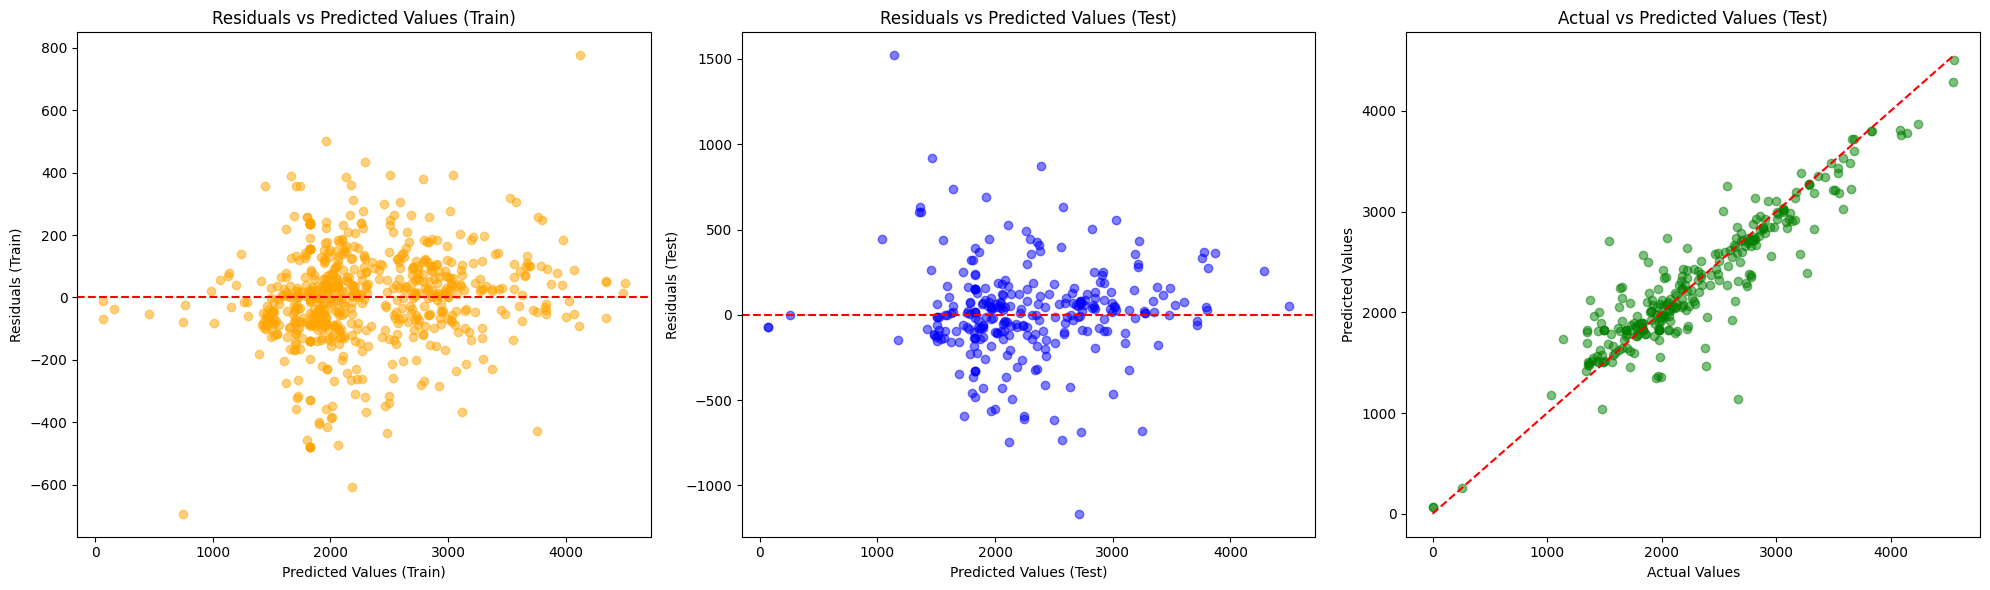

{'Model': 'CatBoost Regressor',
 'Training Time (s)': 4.421647310256958,
 'RMSE Train': 142.0001960459649,
 'RMSE Test': 277.1824454471271,
 'R2 Train': 0.9604878302167684,
 'R2 Test': 0.8479027878146769,
 'MAE Train': 104.63608592665078,
 'MAE Test': 185.45914751387477,
 'Mean Residual Train': -0.24061095808745434,
 'Mean Residual Test': 14.549355104959142,
 'MAPE Train': 825568986310141.6,
 'MAPE Test': 2228633403925729.2}

In [1074]:
cb_results = evaluate_model(CatBoostRegressor(random_state=42, silent=True), 'CatBoost Regressor')
results.append(cb_results)
cb_results

## LightGBM

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 282
[LightGBM] [Info] Number of data points in the train set: 438, number of used features: 2
[LightGBM] [Info] Start training from score 2331.639269
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

<Figure size 1400x600 with 0 Axes>

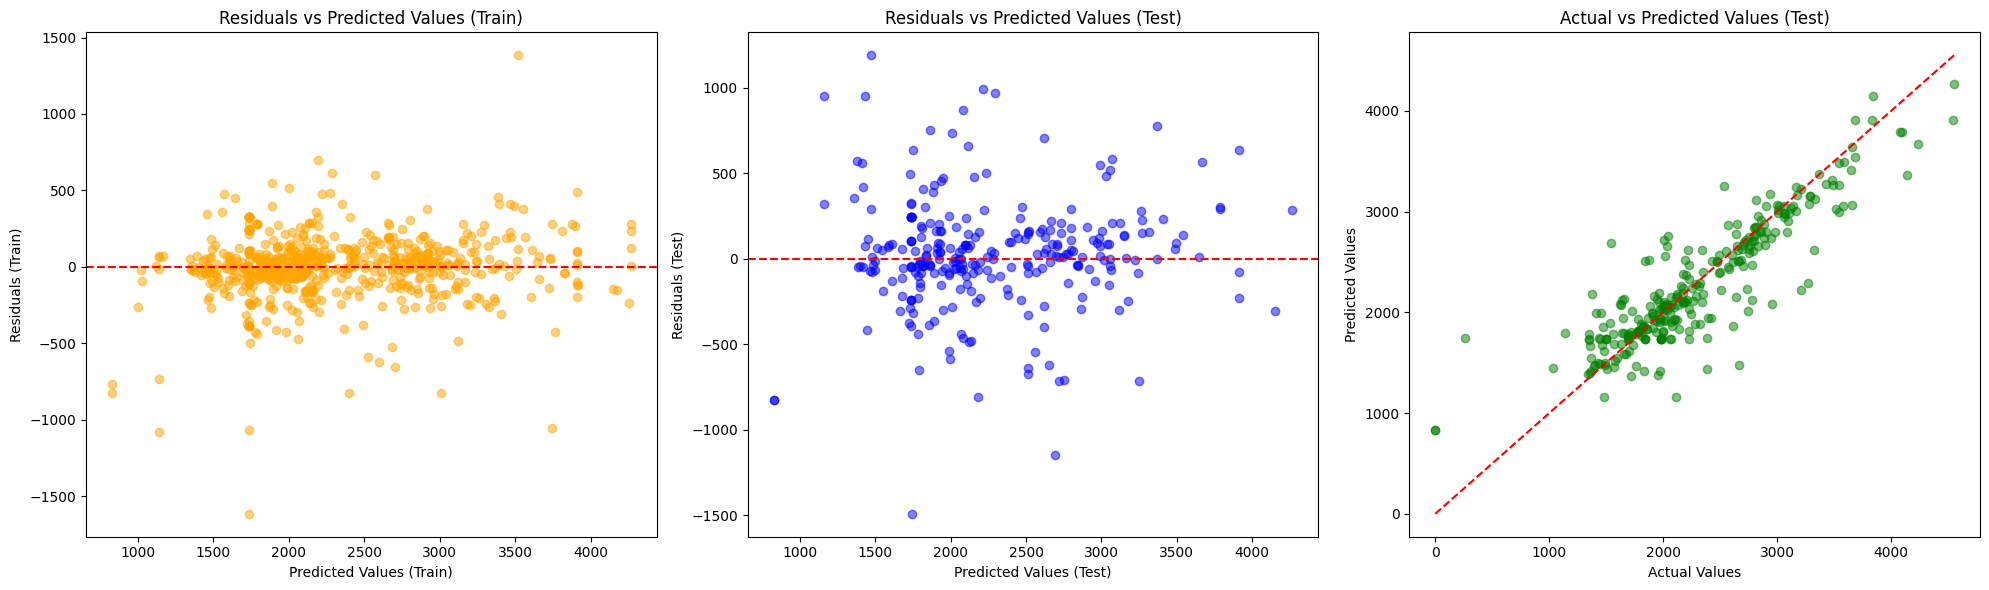

{'Model': 'LightGBM Regressor',
 'Training Time (s)': 0.5025491714477539,
 'RMSE Train': 236.93324725576076,
 'RMSE Test': 327.3618698300312,
 'R2 Train': 0.8903462634746911,
 'R2 Test': 0.7878485545295582,
 'MAE Train': 157.43685349831142,
 'MAE Test': 220.54634791214025,
 'Mean Residual Train': 4.096099871125347e-08,
 'Mean Residual Test': 27.609368904249916,
 'MAPE Train': 7233153479767925.0,
 'MAPE Test': 2.6412429328439584e+16}

In [1075]:
lgbm_results = evaluate_model(LGBMRegressor(random_state=42), 'LightGBM Regressor')
results.append(lgbm_results)
lgbm_results

## ExtraTrees

<Figure size 1400x600 with 0 Axes>

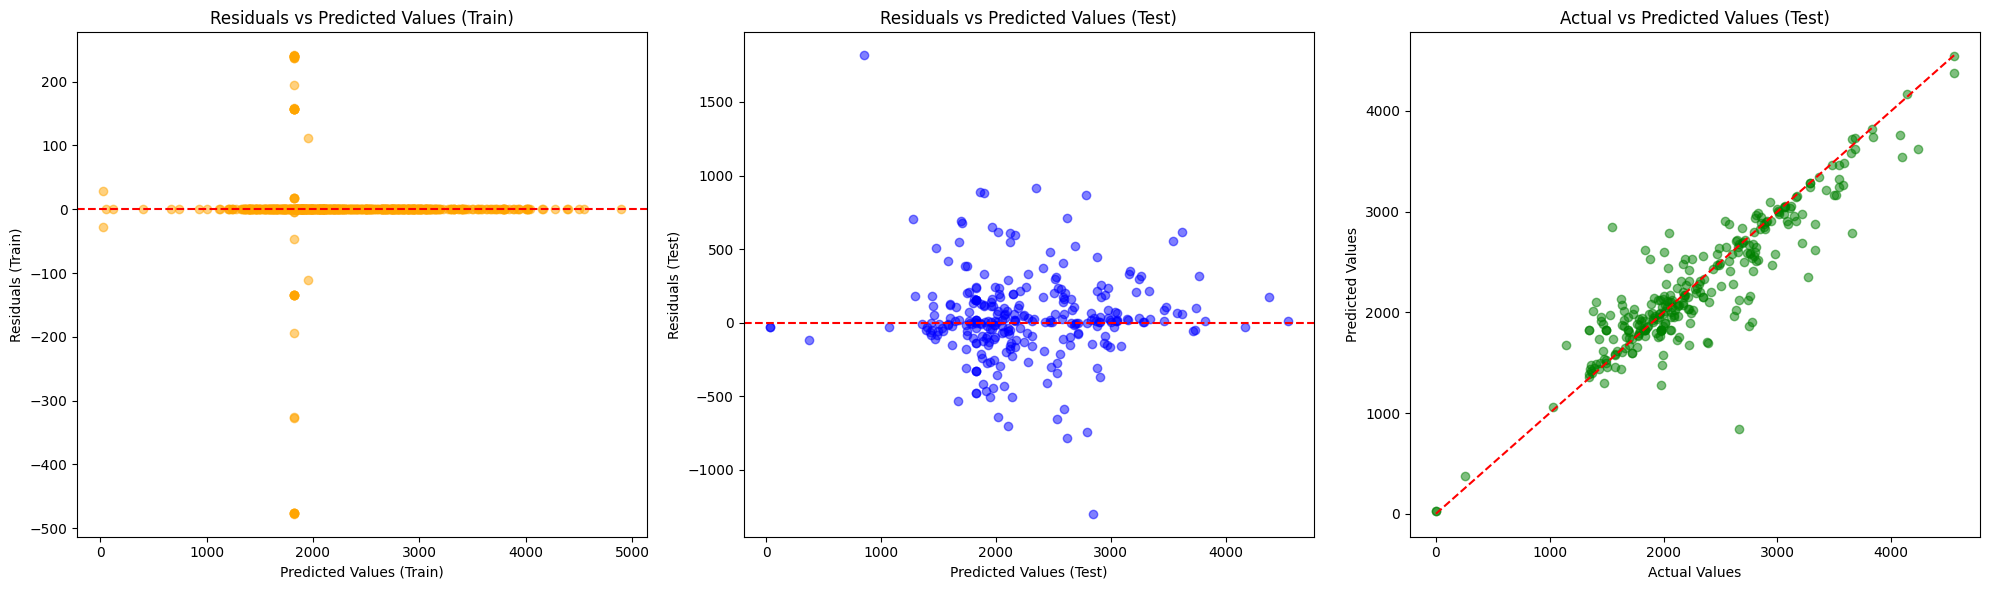

{'Model': 'Extra Trees Regressor',
 'Training Time (s)': 0.904062032699585,
 'RMSE Train': 62.76150470696805,
 'RMSE Test': 296.8913646641603,
 'R2 Train': 0.9923022427637959,
 'R2 Test': 0.8255042146598377,
 'MAE Train': 13.617491020325204,
 'MAE Test': 189.3351277172346,
 'Mean Residual Train': -1.5227460760277336e-14,
 'Mean Residual Test': 33.96515943031769,
 'MAPE Train': 97680813835661.44,
 'MAPE Test': 910302052340844.9}

In [1076]:
et_results = evaluate_model(ExtraTreesRegressor(random_state=42), 'Extra Trees Regressor')
results.append(et_results)
et_results

## Hasil

In [1077]:
results_df = pd.DataFrame(results)

results_df['RMSE Difference'] = results_df['RMSE Test'] - results_df['RMSE Train']
results_df['R2 Difference'] = results_df['R2 Test'] - results_df['R2 Train']
results_df['MAE Difference'] = results_df['MAE Test'] - results_df['MAE Train']
results_df['MAPE Difference'] = results_df['MAPE Test'] - results_df['MAPE Train']

# Menentukan urutan kolom yang diinginkan
columns_order = [
    'Model', 'Training Time (s)', 
    'RMSE Train', 'RMSE Test', 'RMSE Difference',
    'R2 Train', 'R2 Test', 'R2 Difference',
    'MAE Train', 'MAE Test', 'MAE Difference',
    'Mean Residual Train', 'Mean Residual Test',
    'MAPE Train', 'MAPE Test', 'MAPE Difference'
]

# Mengatur urutan kolom dan mengurutkan hasil berdasarkan beberapa metrik
results_df = results_df[columns_order].sort_values(
    by=['RMSE Test', 'RMSE Train', 'RMSE Difference'],
    ascending=[True, True, True]
)

pd.options.display.float_format = '{:.4f}'.format
# Tampilkan DataFrame hasil
results_df

Model  Training Time (s)  RMSE Train  RMSE Test  \
10        CatBoost Regressor             4.4216    142.0002   277.1824   
0              Random Forest             0.7311    128.6988   291.9169   
7          Gradient Boosting             0.4579    183.8244   291.9720   
12     Extra Trees Regressor             0.9041     62.7615   296.8914   
11        LightGBM Regressor             0.5025    236.9332   327.3619   
6                    XGBoost             0.4614     66.9139   349.6961   
5              Decision Tree             0.2775     62.7614   390.4925   
9             Bayesian Ridge             0.2889    498.3854   537.5009   
2                      Ridge             0.2774    498.3804   537.5675   
1          Linear Regression             0.2774    498.3790   537.6257   
3                      Lasso             0.2988    498.3804   537.6927   
4                Elastic Net             0.2695    522.1814   549.1160   
8   Support Vector Regressor             0.4101    710.0344   699.2155   

    RMSE Difference  R2 Train  R2 Test  R2 Difference  MAE Train  MAE Test  \
10         135.1822    0.9605   0.8479        -0.1126   104.6361  185.4591   
0          163.2181    0.9675   0.8313        -0.1362    82.5959  197.8170   
7          108.1476    0.9337   0.8312        -0.1025   137.9065  206.6672   
12         234.1299    0.9923   0.8255        -0.1668    13.6175  189.3351   
11          90.4286    0.8903   0.7878        -0.1025   157.4369  220.5463   
6          282.7822    0.9913   0.7579        -0.2333    25.9094  225.4850   
5          327.7311    0.9923   0.6981        -0.2942    13.6103  230.8794   
9           39.1155    0.5128   0.4281        -0.0847   416.8415  452.1616   
2           39.1872    0.5128   0.4279        -0.0849   416.8672  452.2227   
1           39.2467    0.5128   0.4278        -0.0850   416.8842  452.2749   
3           39.3123    0.5128   0.4277        -0.0852   416.8264  452.2544   
4           26.9346    0.4654   0.4031        -0.0623   434.7891  459.9903   
8          -10.8189    0.0136   0.0321         0.0186   538.4029  529.4216   

    MAE Difference  Mean Residual Train  Mean Residual Test  \
10         80.8231              -0.2406             14.5494   
0         115.2211              -5.0506             36.3545   
7          68.7606              -0.0000              8.9628   
12        175.7176              -0.0000             33.9652   
11         63.1095               0.0000             27.6094   
6         199.5756               0.0098             33.1492   
5         217.2691               0.0000             63.0720   
9          35.3201               0.0000             12.4070   
2          35.3555               0.0000             12.4714   
1          35.3907               0.0000             12.5264   
3          35.4280               0.0000             12.5077   
4          25.2012               0.0000              2.6740   
8          -8.9813             170.9614            163.4625   

               MAPE Train              MAPE Test        MAPE Difference  
10   825568986310141.6250  2228633403925729.2500  1403064417615587.5000  
0   2198392400295978.0000  8522685854100327.0000  6324293453804349.0000  
7    997832987669267.6250  7129409365473846.0000  6131576377804578.0000  
12    97680813835661.4375   910302052340844.8750   812621238505183.5000  
11  7233153479767925.0000 26412429328439584.0000 19179275848671660.0000  
6     79483441077137.3594  1035610677895458.5000   956127236818321.1250  
5     97680813835661.4375   910302052340844.8750   812621238505183.5000  
9  14501071866128318.0000 66994178899242512.0000 52493107033114192.0000  
2  14511587860942398.0000 67030916085364752.0000 52519328224422352.0000  
1  14521652722262610.0000 67062479758306736.0000 52540827036044128.0000  
3  14536254897288518.0000 67129073365649352.0000 52592818468360832.0000  
4  13820396917680066.0000 63940969903681728.0000 50120572986001664.0000  
8  14675995916330898.0000 67101865741101696.0000

In [1078]:
# results_df = pd.DataFrame(results)

# # Sesuaikan nama kolom dengan hasil dari evaluate_model
# results_df['RMSE Difference'] = results_df['Test RMSE'] - results_df['Train RMSE']
# results_df['R2 Difference'] = results_df['Test R2'] - results_df['Train R2']
# results_df['MAE Difference'] = results_df['Test MAE'] - results_df['Train MAE']
# results_df['MAPE Difference'] = results_df['Test MAPE'] - results_df['Train MAPE']

# columns_order = ['Model', 'Training Time (s)', 
#                  'Train RMSE', 'Test RMSE', 'RMSE Difference',
#                  'Train R2', 'Test R2', 'R2 Difference',
#                  'Train MAE', 'Test MAE', 'MAE Difference', 
#                  'Residual Mean Train', 'Residual Mean Test',
#                  'Train MAPE', 'Test MAPE', 'MAPE Difference']

# results_df = results_df[columns_order].sort_values(by=['Test RMSE', 'Train RMSE', 'RMSE Difference'], ascending=[True, True, True])

# results_df

# Model: Tuning

In [1079]:
from sklearn.model_selection import GridSearchCV

In [1080]:
results = []

## Linear Regression (no tuning needed)

<Figure size 1400x600 with 0 Axes>

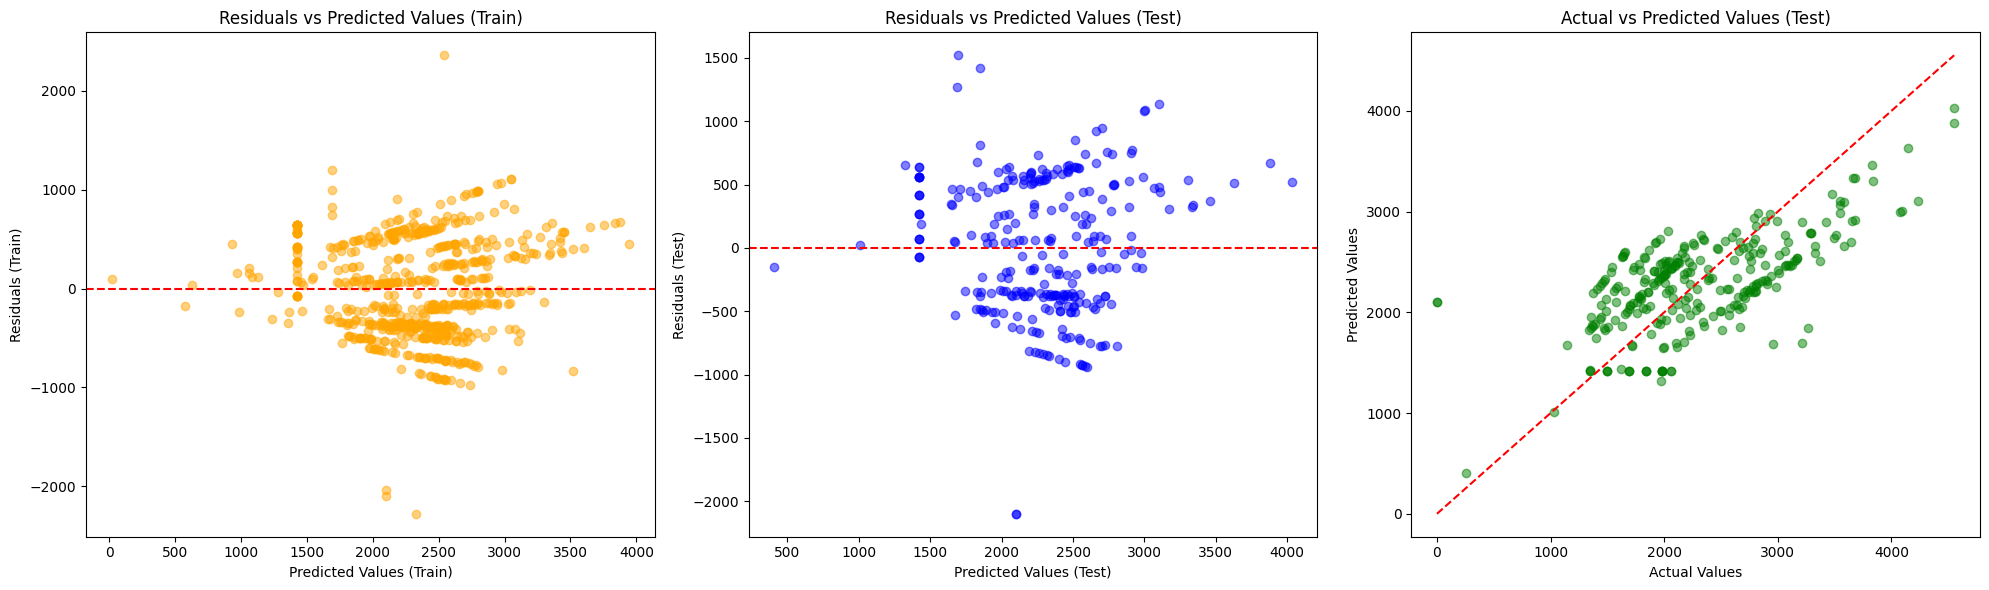

In [1081]:
results.append(evaluate_model(LinearRegression(), 'Linear Regression'))

## Ridge

<Figure size 1400x600 with 0 Axes>

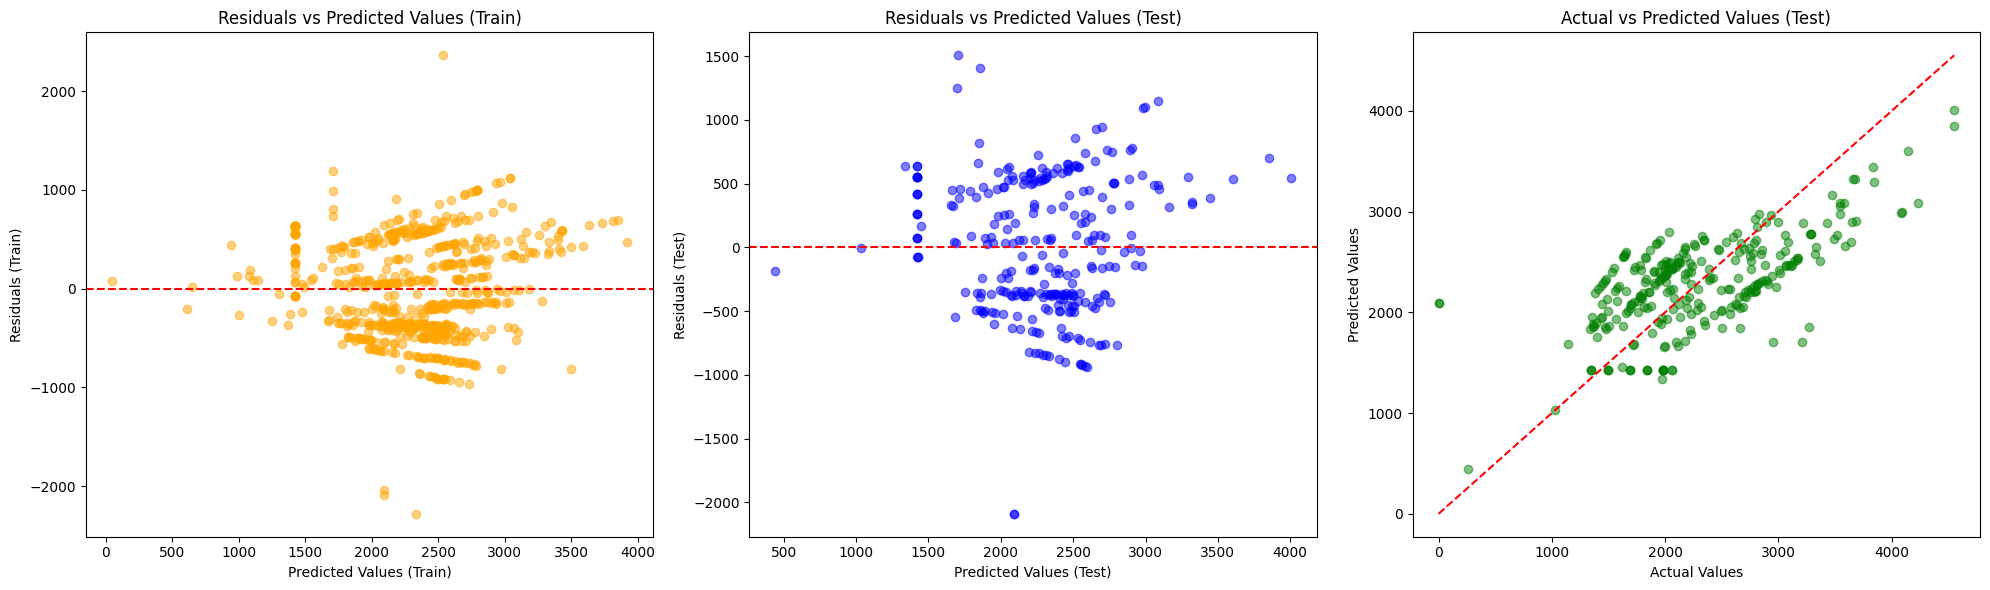

In [1082]:
ridge_params = {
    'alpha': [0.1, 1.0, 10.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga'] 
}
ridge_model = GridSearchCV(Ridge(), ridge_params, scoring='neg_mean_absolute_error', cv=3)
ridge_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(ridge_model.best_estimator_, 'Ridge'))

## Lasso

c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
12 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py

<Figure size 1400x600 with 0 Axes>

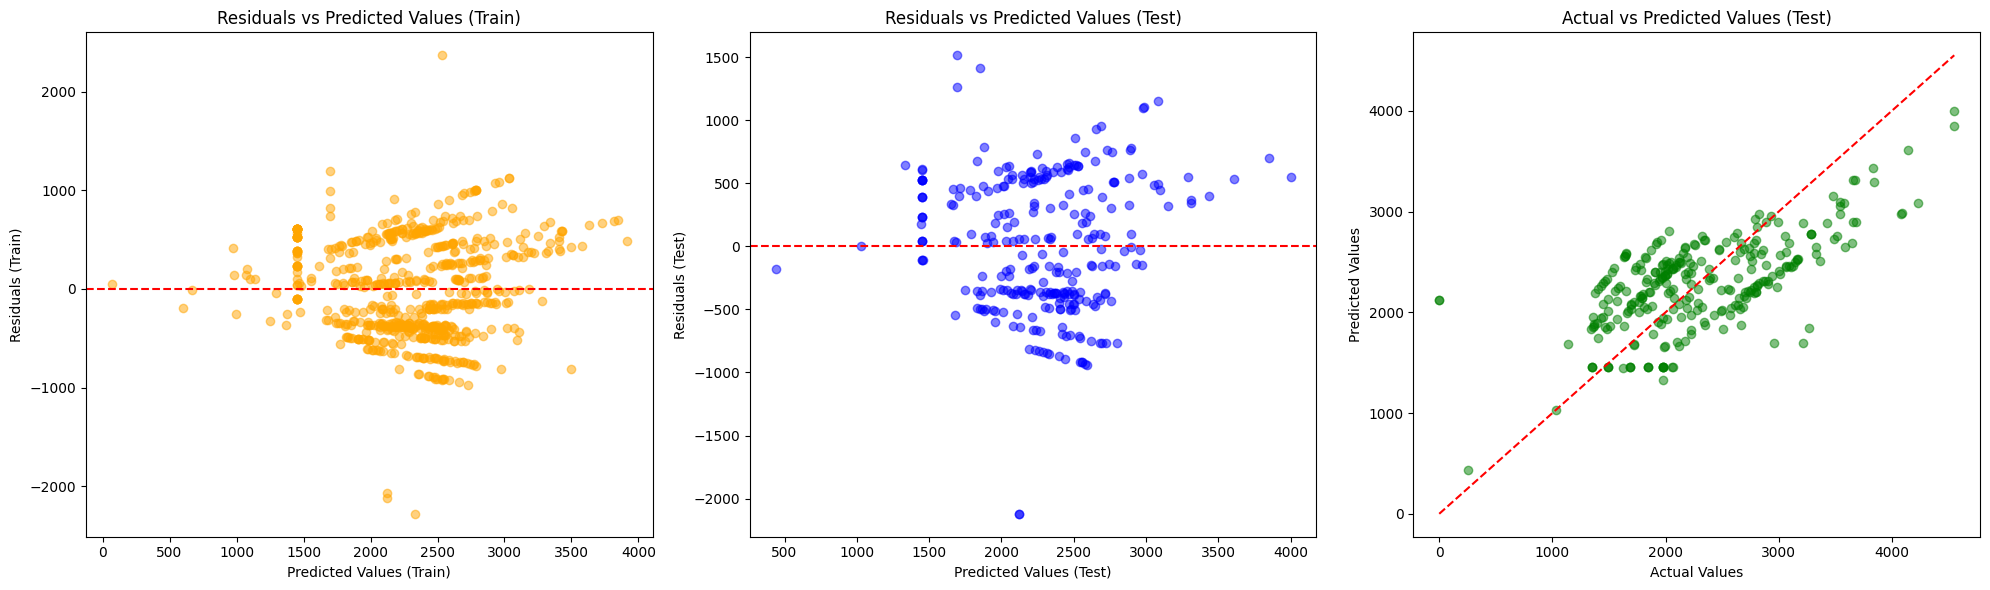

In [1083]:
# Lasso dengan tuning
lasso_params = {
    'alpha': [0.1, 1.0, 10.0, None],  
    'fit_intercept': [True, False],   
    'max_iter': [1000, 5000]          
}
lasso_model = GridSearchCV(Lasso(), lasso_params, scoring='neg_mean_absolute_error', cv=3)
lasso_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(lasso_model.best_estimator_, 'Lasso'))


## ElasticNet

c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
72 fits failed out of a total of 288.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.p

<Figure size 1400x600 with 0 Axes>

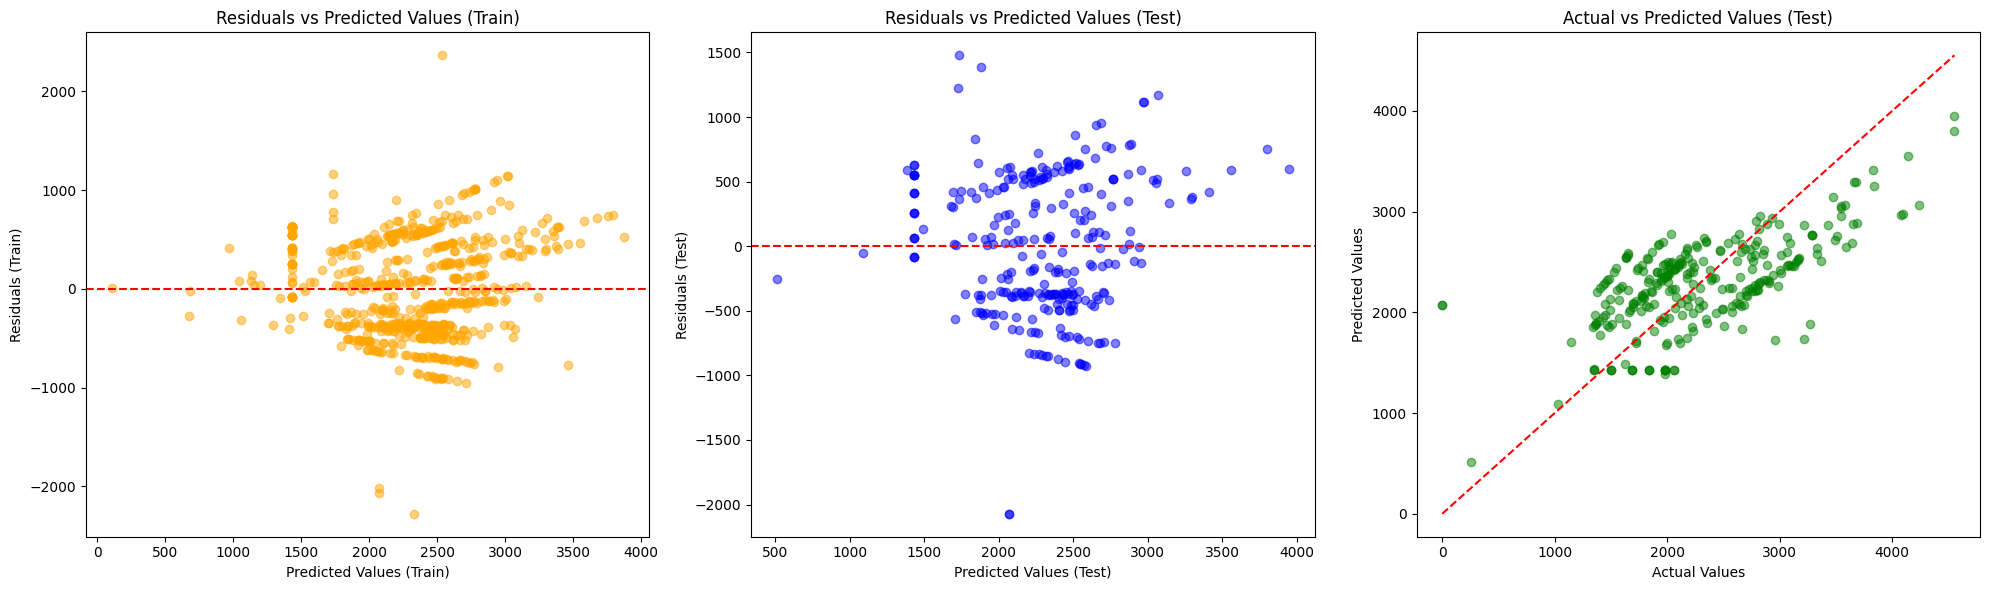

In [1084]:
elastic_params = {
    'alpha': [0.1, 1.0, 10.0, None],
    'l1_ratio': [0.1, 0.5, 0.9],
    'fit_intercept': [True, False],
    'max_iter': [1000, 5000],
    'tol': [1e-4, 1e-3]
}
elastic_model = GridSearchCV(ElasticNet(), elastic_params, scoring='neg_mean_absolute_error', cv=3)
elastic_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(elastic_model.best_estimator_, 'Elastic Net'))

## Decision Tree

c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
108 fits failed out of a total of 324.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base

<Figure size 1400x600 with 0 Axes>

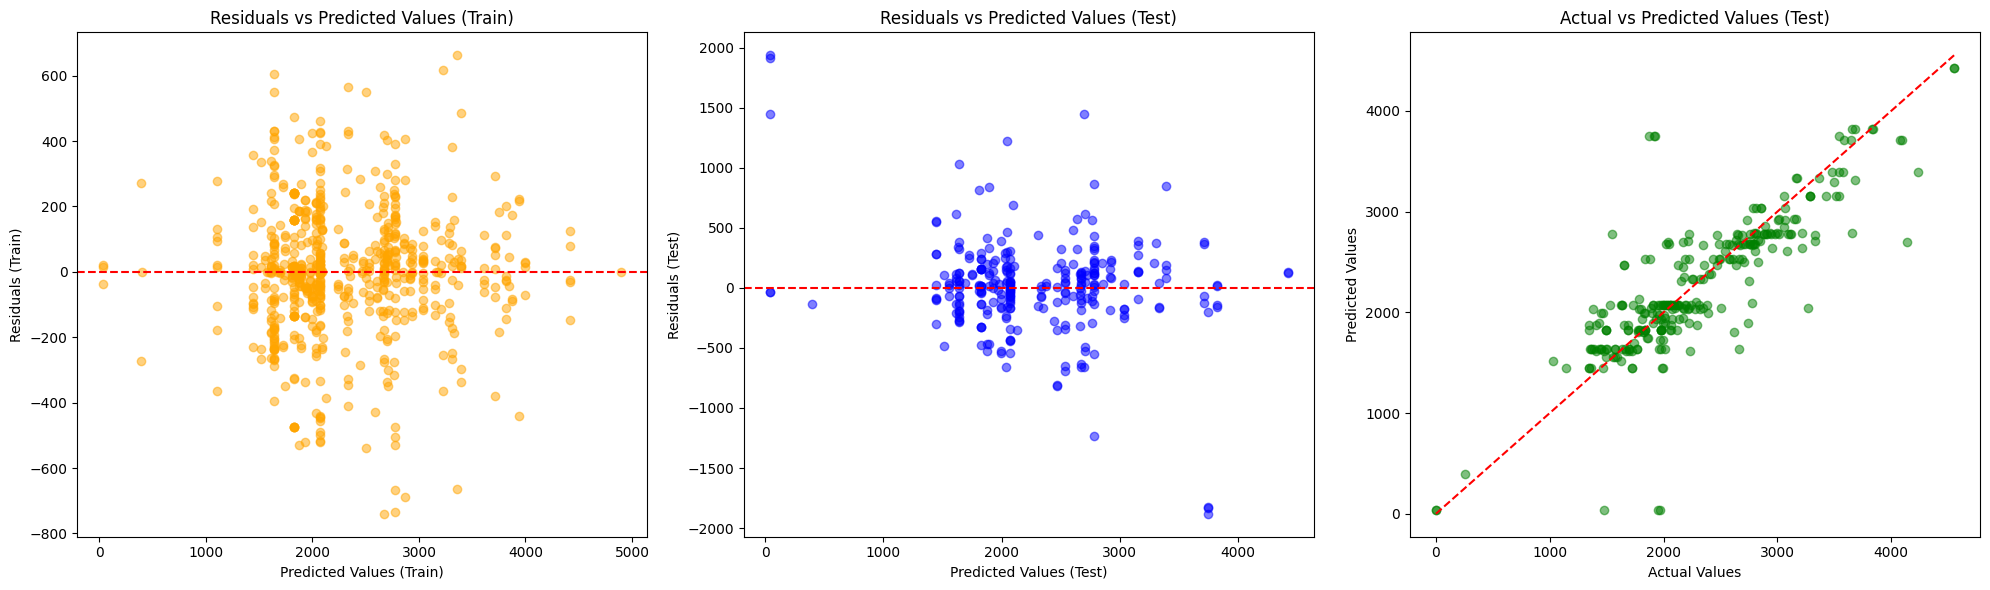

In [1085]:
# Decision Tree dengan tuning
dt_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
dt_model = GridSearchCV(DecisionTreeRegressor(), dt_params, scoring='neg_mean_absolute_error', cv=3)
dt_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(dt_model.best_estimator_, 'Decision Tree'))

## XGBoost

<Figure size 1400x600 with 0 Axes>

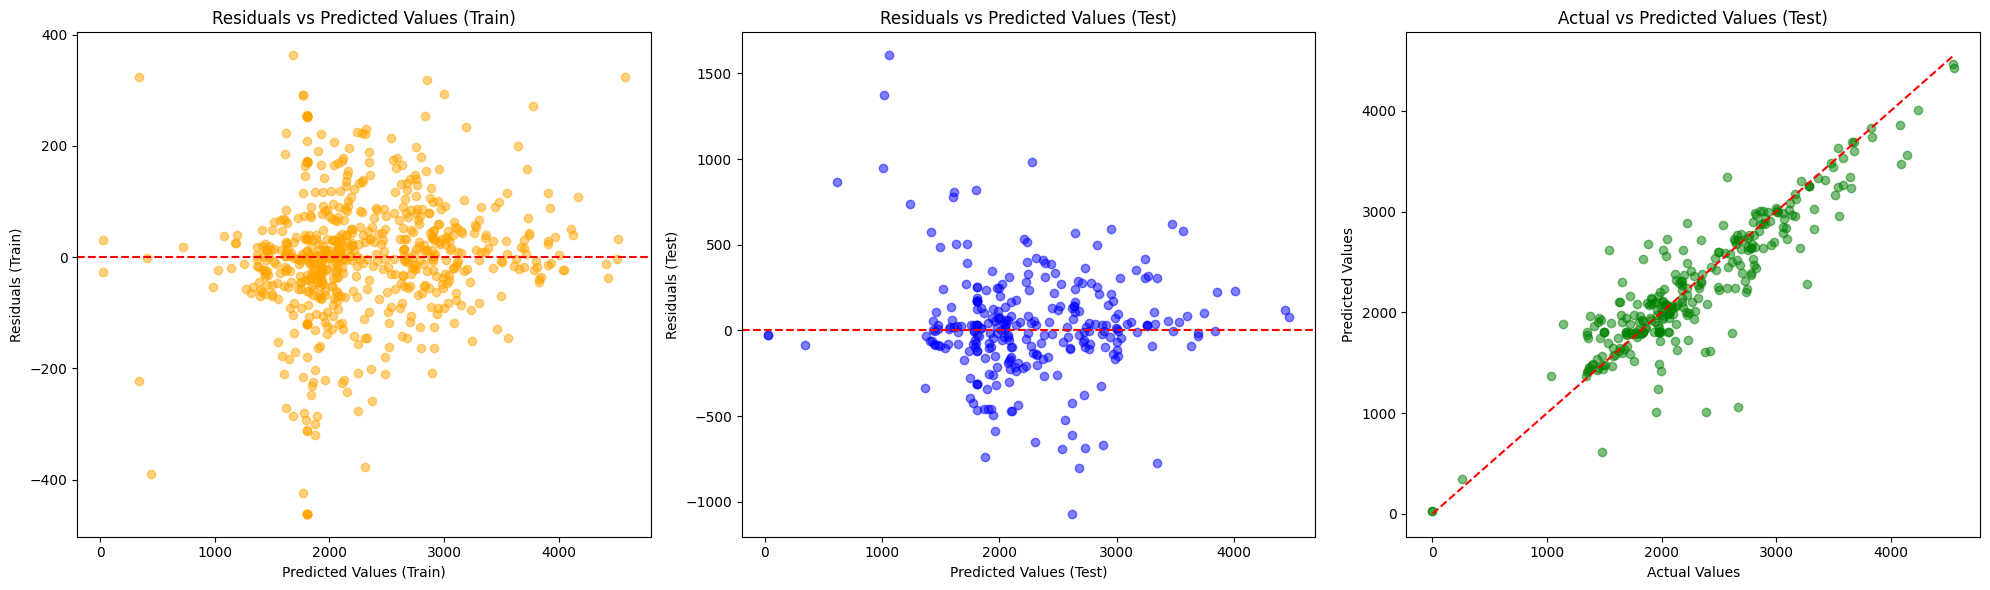

In [1086]:
xgb_params = {
    'n_estimators': [50, 100],        
    'max_depth': [3, 5],               
    'learning_rate': [0.01, 0.1, 0.2], 
    'subsample': [0.8, 1.0]            # Proporsi data yang digunakan untuk setiap pohon
}
xgb_model = GridSearchCV(XGBRegressor(), xgb_params, scoring='neg_mean_absolute_error', cv=3)
xgb_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(xgb_model.best_estimator_, 'XGBoost'))


## Gradient Boosting

<Figure size 1400x600 with 0 Axes>

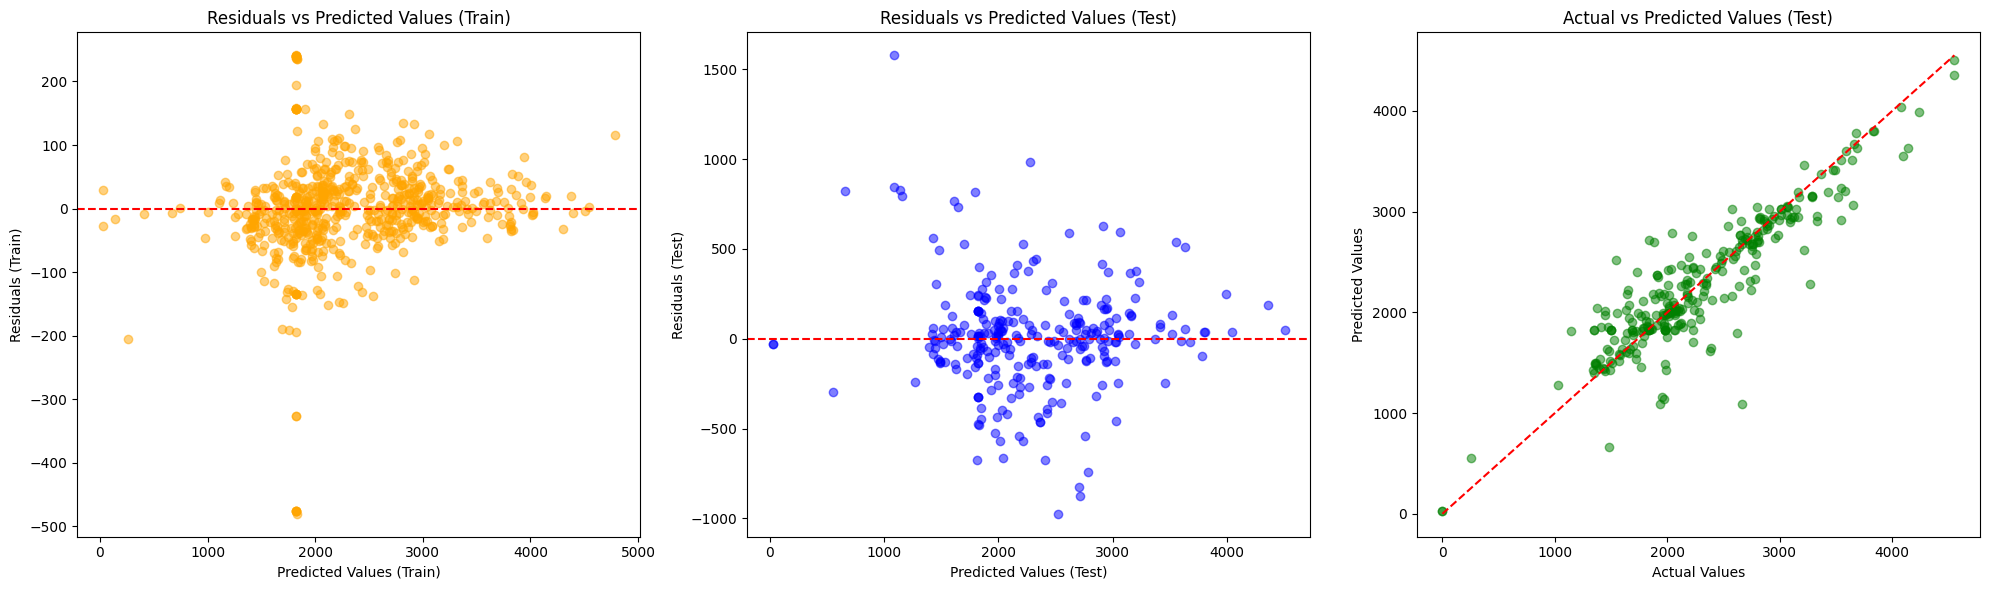

In [1087]:
gb_params = {
    'n_estimators': [100, 200], 
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
gb_model = GridSearchCV(GradientBoostingRegressor(), gb_params, scoring='neg_mean_absolute_error', cv=3)
gb_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(gb_model.best_estimator_, 'Gradient Boosting'))

## SVR

<Figure size 1400x600 with 0 Axes>

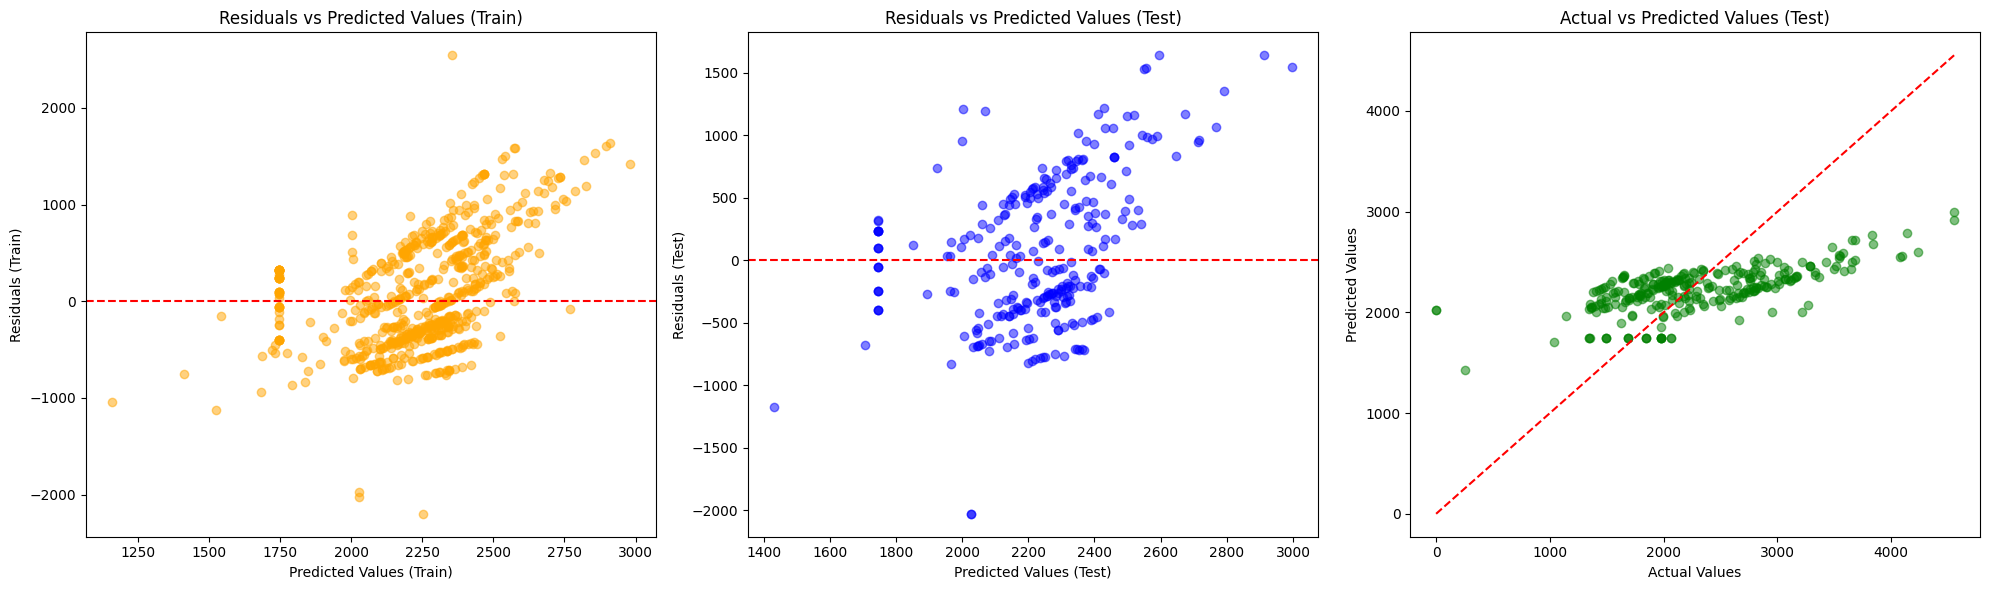

In [1088]:
# SVR dengan tuning
svr_params = {
    'C': [0.1, 1.0],                    # Regularization parameter
    'epsilon': [0.1, 0.2],              # Margin of tolerance
    'kernel': ['linear', 'rbf','poly','sigmoid']
}
svr_model = GridSearchCV(SVR(), svr_params, scoring='neg_mean_absolute_error', cv=3)
svr_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(svr_model.best_estimator_, 'SVR'))

## Bayesian Ridge

<Figure size 1400x600 with 0 Axes>

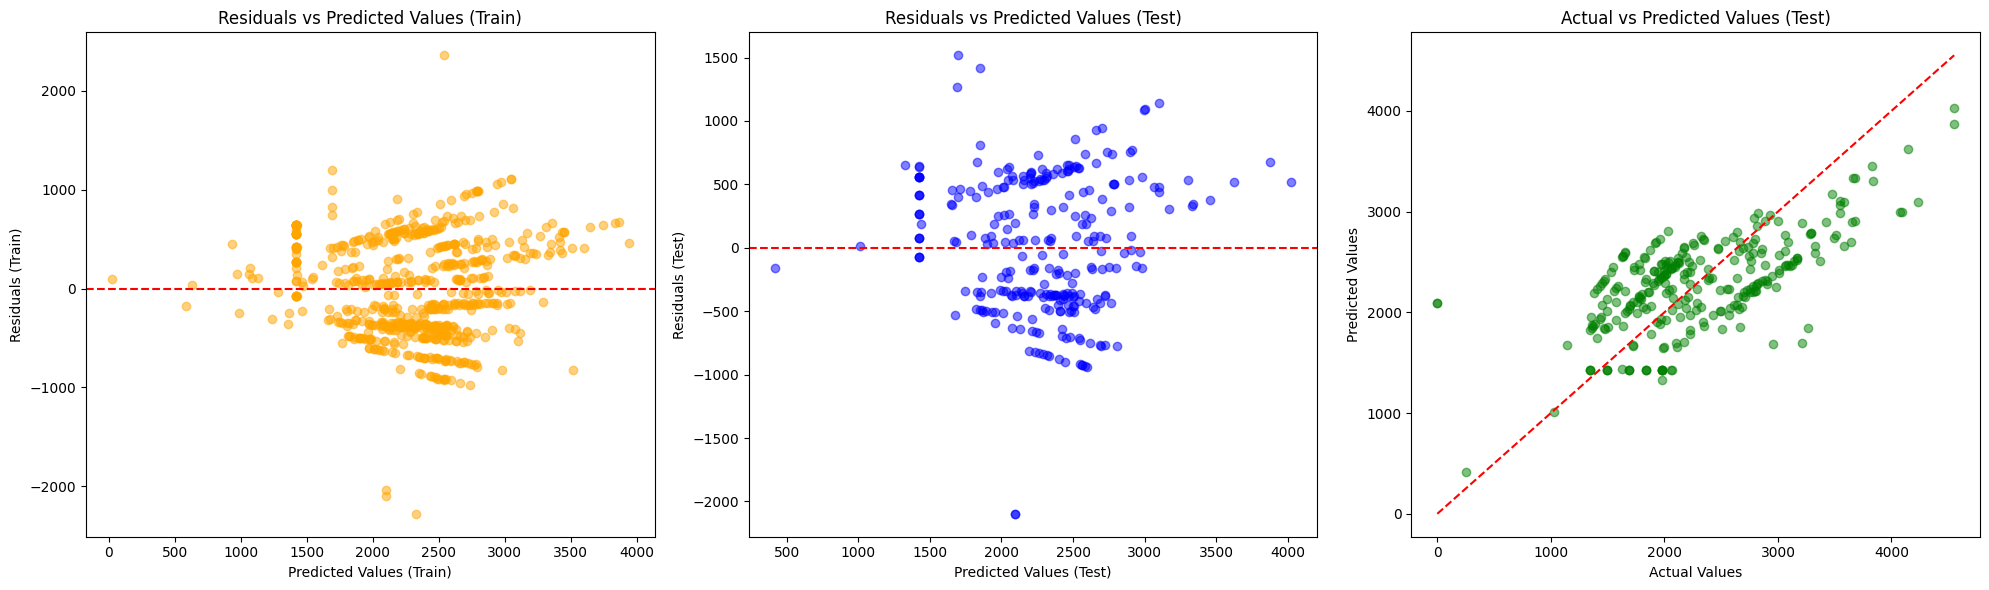

In [1089]:
# Bayesian Ridge tanpa tuning
results.append(evaluate_model(BayesianRidge(), 'Bayesian Ridge'))

## CatBoost

<Figure size 1400x600 with 0 Axes>

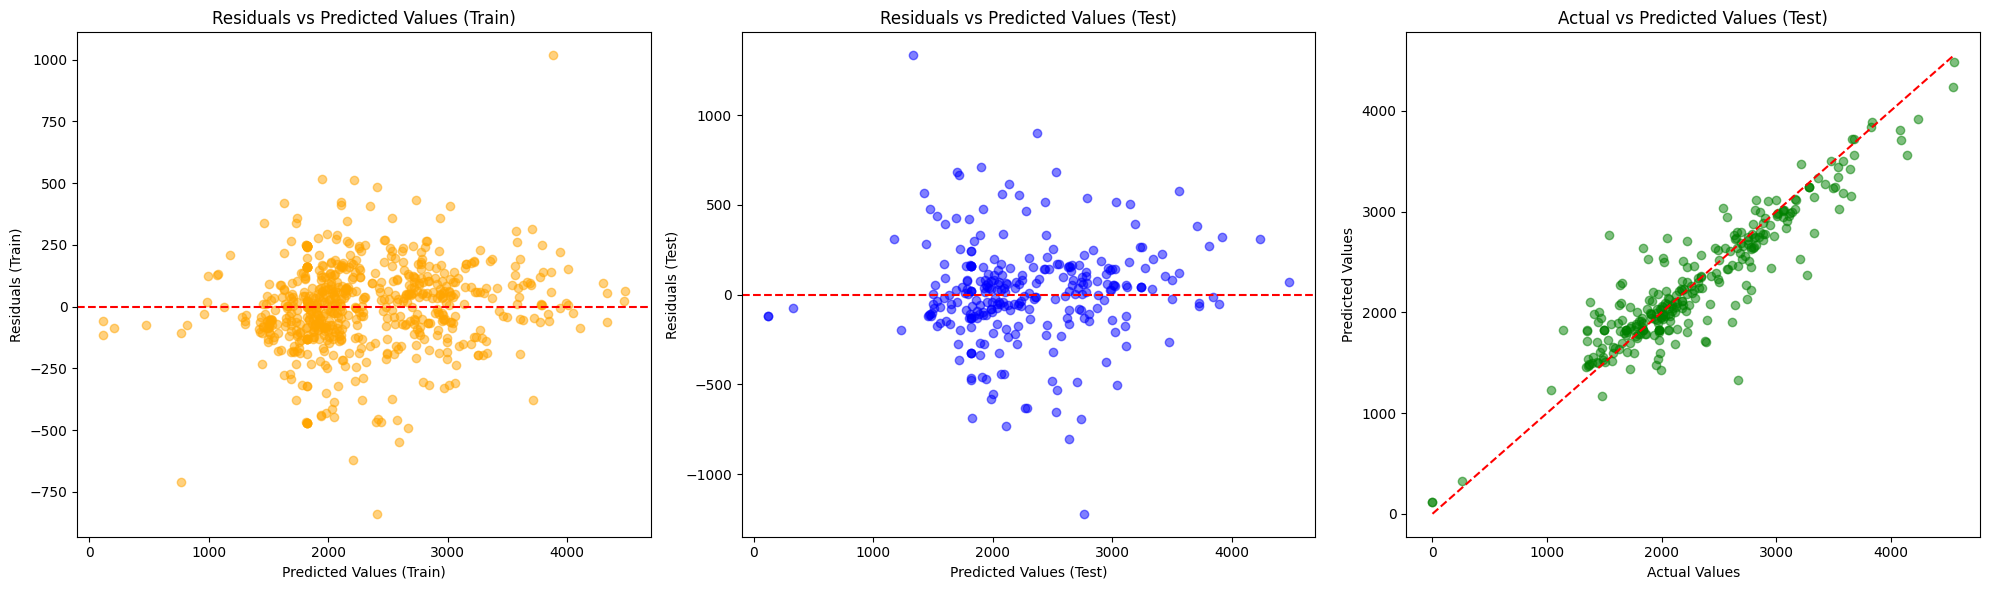

In [1090]:
cat_params = {
    'depth': [None, 6, 8], 
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1],
    'l2_leaf_reg': [3, 5] 
}
cat_model = GridSearchCV(CatBoostRegressor(silent=True), cat_params, scoring='neg_mean_absolute_error', cv=3)
cat_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(cat_model.best_estimator_, 'CatBoost'))

## LightGBM

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 280
[LightGBM] [Info] Number of data points in the train set: 438, number of used features: 2
[LightGBM] [Info] Start training from score 2278.732877
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

<Figure size 1400x600 with 0 Axes>

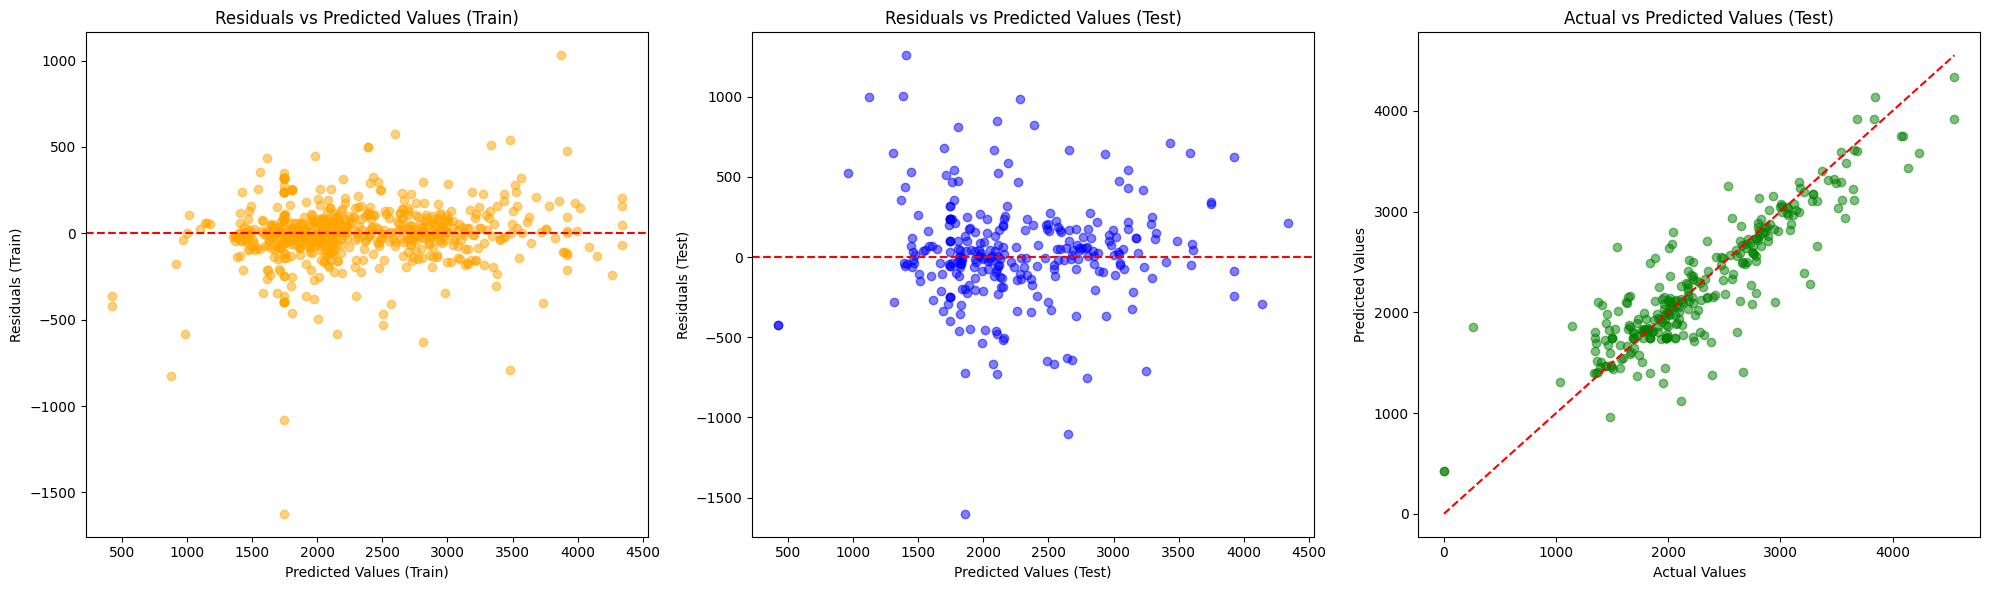

In [1091]:
lgb_params = {
    'num_leaves': [31, 61],            
    'learning_rate': [0.1, 0.2],       
    'max_depth': [None, 5, 10]         
}

lgb_model = GridSearchCV(LGBMRegressor(), lgb_params, scoring='neg_mean_absolute_error', cv=3)
lgb_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(lgb_model.best_estimator_, 'LightGBM'))


## Extra Trees

c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py

<Figure size 1400x600 with 0 Axes>

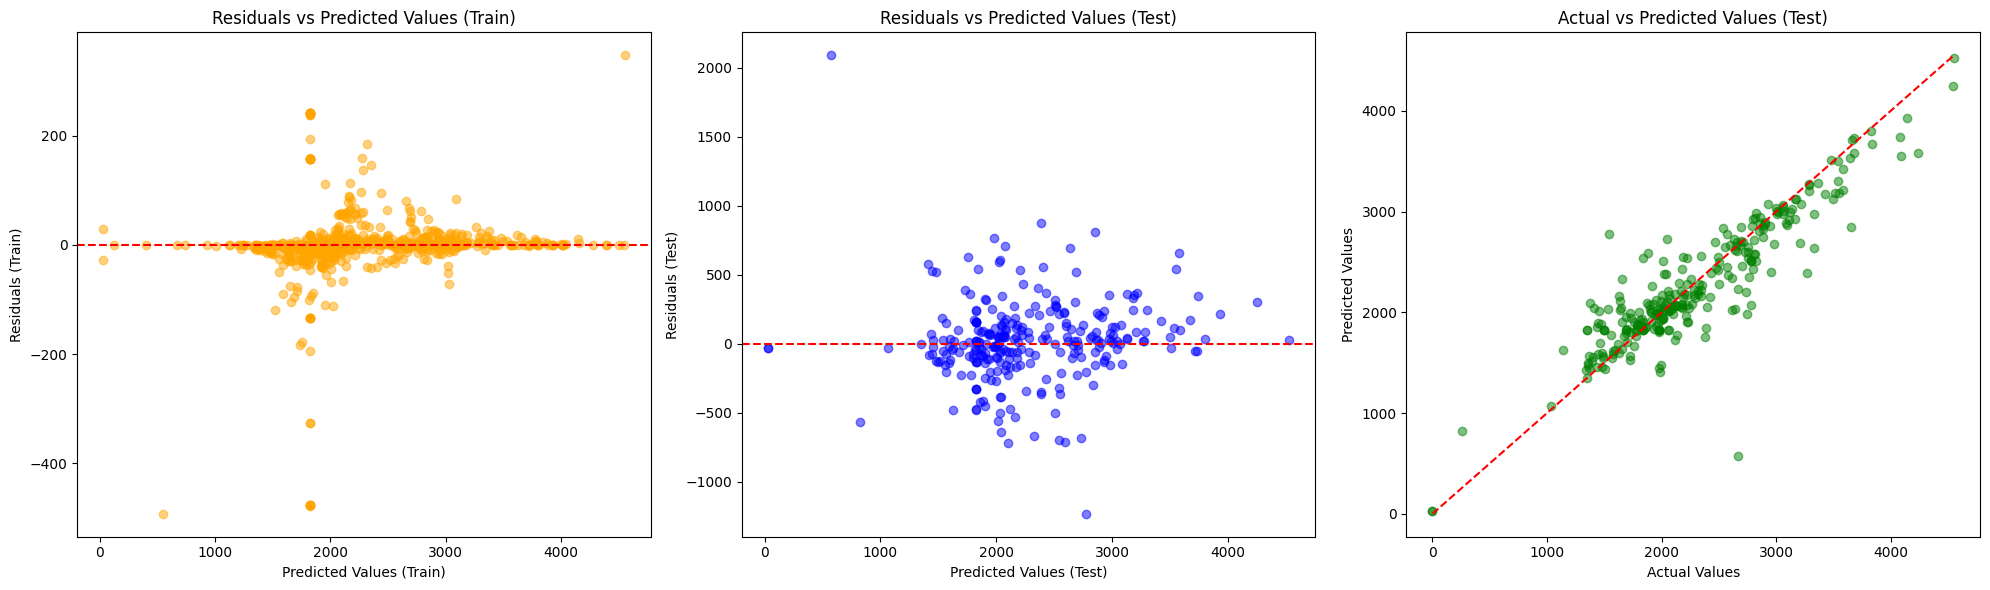

In [1092]:
et_params = {
    'n_estimators': [50, 100], 
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20]
}
et_model = GridSearchCV(ExtraTreesRegressor(), et_params, scoring='neg_mean_absolute_error', cv=3)
et_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(et_model.best_estimator_, 'Extra Trees'))

## Hasil

In [1093]:
results_df = pd.DataFrame(results)

results_df['RMSE Difference'] = results_df['RMSE Test'] - results_df['RMSE Train']
results_df['R2 Difference'] = results_df['R2 Test'] - results_df['R2 Train']
results_df['MAE Difference'] = results_df['MAE Test'] - results_df['MAE Train']
results_df['MAPE Difference'] = results_df['MAPE Test'] - results_df['MAPE Train']

results_df = results_df[columns_order].sort_values(by=['RMSE Test','RMSE Train','RMSE Difference'],ascending=[True,True,True])

results_df

Model  Training Time (s)  RMSE Train  RMSE Test  \
9            CatBoost             2.3743    163.9013   278.4642   
11        Extra Trees             0.5482     67.1739   299.9186   
6   Gradient Boosting             1.0210     70.1928   300.5109   
5             XGBoost             0.5141     90.0244   312.6797   
10           LightGBM             0.6043    199.1409   325.4087   
4       Decision Tree             0.3210    212.4912   407.2039   
3         Elastic Net             0.3548    498.9438   536.3672   
1               Ridge             0.3110    498.5049   537.1044   
8      Bayesian Ridge             0.4034    498.3854   537.5009   
0   Linear Regression             0.4012    498.3790   537.6257   
2               Lasso             0.3637    498.5150   538.4003   
7                 SVR             0.5015    604.3397   593.0157   

    RMSE Difference  R2 Train  R2 Test  R2 Difference  MAE Train  MAE Test  \
9          114.5630    0.9475   0.8465        -0.1010   120.8953  192.0772   
11         232.7447    0.9912   0.8219        -0.1693    23.2575  198.0326   
6          230.3181    0.9904   0.8212        -0.1691    36.4813  200.6535   
5          222.6553    0.9841   0.8065        -0.1777    58.4322  207.7054   
10         126.2678    0.9225   0.7904        -0.1321   129.7644  220.0148   
4          194.7128    0.9117   0.6717        -0.2399   146.2173  252.6574   
3           37.4234    0.5117   0.4305        -0.0812   416.8643  451.1765   
1           38.5995    0.5126   0.4289        -0.0837   416.7667  451.7784   
8           39.1155    0.5128   0.4281        -0.0847   416.8415  452.1616   
0           39.2467    0.5128   0.4278        -0.0850   416.8842  452.2749   
2           39.8853    0.5126   0.4261        -0.0864   416.3744  452.0726   
7          -11.3240    0.2847   0.3038         0.0191   478.1406  480.0656   

    MAE Difference  Mean Residual Train  Mean Residual Test  \
9          71.1818              -0.0145             11.4130   
11        174.7752              -0.0000             24.3490   
6         164.1723              -0.0000             10.5159   
5         149.2732               1.7033             29.6413   
10         90.2504               0.0000             28.5529   
4         106.4401              -0.0000             17.9904   
3          34.3122               0.0000             10.8580   
1          35.0118               0.0000             11.9890   
8          35.3201               0.0000             12.4070   
0          35.3907               0.0000             12.5264   
2          35.6982               0.0000             12.3431   
7           1.9251              72.1232             69.8195   

               MAPE Train              MAPE Test        MAPE Difference  
9   1511347711075573.7500  3726044578393400.5000  2214696867317826.7500  
11    97680813835661.4531   910302052340844.8750   812621238505183.3750  
6    172759806854169.8438   872883257905206.5000   700123451051036.6250  
5    101158841743413.0156   846868431455021.3750   745709589711608.3750  
10  4382469577339181.5000 13464780292399926.0000  9082310715060744.0000  
4   1969610795937781.2500  1160502031639206.0000  -809108764298575.2500  
3  14329247332822082.0000 66165103391706904.0000 51835856058884824.0000  
1  14426750475531184.0000 66759391024705416.0000 52332640549174232.0000  
8  14501071866128318.0000 66994178899242512.0000 52493107033114192.0000  
0  14521652722262610.0000 67062479758306736.0000 52540827036044128.0000  
2  14668898347133178.0000 67735121399121704.0000 53066223051988528.0000  
7  14197712250700192.0000 64763641865370664.0000 50565929614670472.0000

## Feature Importance

In [1094]:
# Example models: catboost_model, gradient_boosting_model, extra_trees_model, xgboost_model, lightgbm_model

# CatBoost
best_cat_model = cat_model.best_estimator_
catboost_importance = best_cat_model.get_feature_importance()

# Gradient Boosting
best_gb_model = gb_model.best_estimator_
gradient_boosting_importance = best_gb_model.feature_importances_

# Extra Trees
best_et_model = et_model.best_estimator_
extra_trees_importance = best_et_model.feature_importances_

# XGBoost
best_xgb_model = xgb_model.best_estimator_
xgboost_importance = best_xgb_model.feature_importances_

# LightGBM
best_lgb_model = lgb_model.best_estimator_
lightgbm_importance = best_lgb_model.feature_importances_


In [1095]:
# Assuming you have a list of feature names
feature_names = X_train.columns

# Create a DataFrame for each model’s feature importance for easy viewing
catboost_df = pd.DataFrame({'Feature': feature_names, 'Importance': catboost_importance})
gradient_boosting_df = pd.DataFrame({'Feature': feature_names, 'Importance': gradient_boosting_importance})
extra_trees_df = pd.DataFrame({'Feature': feature_names, 'Importance': extra_trees_importance})
xgboost_df = pd.DataFrame({'Feature': feature_names, 'Importance': xgboost_importance})
lightgbm_df = pd.DataFrame({'Feature': feature_names, 'Importance': lightgbm_importance})

# Sort each DataFrame by importance for clarity
catboost_df = catboost_df.sort_values(by='Importance', ascending=False)
gradient_boosting_df = gradient_boosting_df.sort_values(by='Importance', ascending=False)
extra_trees_df = extra_trees_df.sort_values(by='Importance', ascending=False)
xgboost_df = xgboost_df.sort_values(by='Importance', ascending=False)
lightgbm_df = lightgbm_df.sort_values(by='Importance', ascending=False)

catboost_df


Feature  Importance
0  DistancePerStep     51.4248
1        Total_MET     48.5752

In [1096]:
gradient_boosting_df

Feature  Importance
0  DistancePerStep      0.5940
1        Total_MET      0.4060

In [1097]:
extra_trees_df

Feature  Importance
1        Total_MET      0.5200
0  DistancePerStep      0.4800

In [1098]:
xgboost_df

Feature  Importance
0  DistancePerStep      0.5529
1        Total_MET      0.4471

In [1099]:
lightgbm_df

Feature  Importance
0  DistancePerStep        1304
1        Total_MET        1061

## Stacking